# SPEED DATING EXPERIMENT

### DS-GA-23 Final Project
#### Miranda Remmer


****

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model, feature_selection, neighbors, metrics, grid_search, cross_validation

%run 'functions_datingexp.ipynb'

%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)

## Q: Does one’s perception of themselves predict their dating outcomes? 

- Does this differ by gender? 
- Does this differ by age?

**Hypothesis**: people who have lower self esteem (i.e. negatively evaluate themselves by giving themselves lower scores on the attribute scale) will get less dates/matches; while those who give themselves higher ratings will get more.  Women are more likely to give themselves more critical ratings than men, thus negatively affecting their outcome. 

Look at how people view/score themselves alongside how others score them. 



##### General Variable KEY:

| Variable | Description |
| ---| ---|
|attr | Attractive|
|sinc |Sincere  |
|intel | Intelligent|
| fun | Fun|
| amb | Ambitious|
| shar |Shared Interests/Hobbies

***Each feature has a code at the end of the variable which references the survey question and when in the experiment the question was being asked*** (signup, during dating expirement, after dating experiment)

| Feature CODE | Scale | When during Experiment? |Question| 
| :------:| :------:| :------: |:------|
|**oPercveMe_1**| 1-10| Signup|How do you think others perceive you? |
|**oPercveMe_2**| 1-10| After event|How do you think others perceive you? |
|**iRateMe_exp**| 1-10| During event|Rate your opinion of your own attributes  |
|  **iMeasUp_1**| 1-10 | Signup| Based on what you think the opposite sex looks for in a date, how do you think you measure up?
|**iMeasUp_2**| 1-10| After event| Based on what you think the opposite sex looks for in a date, how do you think you measure up?
|  **attr; shar**| 1-10 | During event (after each date)| Subject's rating of parter |
|**attr_o; shar_o**| 1-10 | During event (after each date)| Partner's rating of subject|


| Feature | Scale | When during Experiment? |Question/Description| 
| :------:| :------:| :------: |:------|
|**exphappy** | 1-10 | Signup survey| Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event? |
|**expnum** | 0-20ppl |Signup survey | Out of the 20 people you will meet, how many do you expect will be interested in dating you?|
|**match_es** | *changes based on met_count* | End of experiment|  How many matches do you estimate you will get (a match occurs when you and your partner both check “Yes” next to decision)?|
| **dec** | 1=yes, 0=no | After each date round | Decision|
|**dec_o**|  1=yes, 0=no| After each date round | Decision of partner| 


**met_count**: number of people that subject met with during experiement

**match**:	1=yes | 0=no *determined after dating event if both subject and parter selected 'yes' under 'dec' on their scorecard*



**iid**: unique number for each subject

**gender**: 1=M | 0=F


In [2]:
df_raw = pd.read_csv(os.path.join('..', 'CODE', 'speed-dating-experiment', 'Speed Dating Data.csv'))

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


Look at the data to check the column names:

In [3]:
df_raw.columns

Index([u'iid', u'id', u'gender', u'idg', u'condtn', u'wave', u'round',
       u'position', u'positin1', u'order',
       ...
       u'attr3_3', u'sinc3_3', u'intel3_3', u'fun3_3', u'amb3_3', u'attr5_3',
       u'sinc5_3', u'intel5_3', u'fun5_3', u'amb5_3'],
      dtype='object', length=195)

In [4]:
df_raw

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


### Creating New Dataset with Desired Columns


In [5]:
subset_df = df_raw[['iid', 'pid', 'gender', 'age', 'round',
                    'match', 'dec', 'dec_o', 
                    'exphappy', 'expnum', 'match_es', 
                    'like', 'prob', 'like_o', 'prob_o', 
                    'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 
                    'attr3_2', 'sinc3_2', 'fun3_2', 'intel3_2', 'amb3_2', 
                    'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 
                    'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2', 
                    'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s',
                    'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 
                    'attr_o', 'sinc_o', 'intel_o', 'fun_o','amb_o','shar_o']]
subset_df

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,1,11.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,7.0,6.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0
1,1,12.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,8.0,5.0,6.0,7.0,8.0,10.0,7.0,7.0,5.0
2,1,13.0,0,21.0,10,1,1,1,3.0,2.0,...,9.0,8.0,5.0,7.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1,14.0,0,21.0,10,1,1,1,3.0,2.0,...,8.0,7.0,6.0,8.0,7.0,8.0,9.0,8.0,9.0,8.0
4,1,15.0,0,21.0,10,1,1,1,3.0,2.0,...,7.0,7.0,6.0,6.0,8.0,7.0,9.0,6.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,526.0,1,25.0,22,0,0,1,10.0,NaN,...,5.0,5.0,NaN,NaN,10.0,5.0,3.0,2.0,6.0,5.0
8374,552,527.0,1,25.0,22,0,0,0,10.0,NaN,...,8.0,4.0,4.0,NaN,6.0,3.0,7.0,3.0,7.0,2.0
8375,552,528.0,1,25.0,22,0,0,0,10.0,NaN,...,8.0,8.0,8.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0
8376,552,529.0,1,25.0,22,0,0,1,10.0,NaN,...,5.0,4.0,NaN,5.0,5.0,7.0,5.0,5.0,3.0,6.0


In [6]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 52 columns):
iid         8378 non-null int64
pid         8368 non-null float64
gender      8378 non-null int64
age         8283 non-null float64
round       8378 non-null int64
match       8378 non-null int64
dec         8378 non-null int64
dec_o       8378 non-null int64
exphappy    8277 non-null float64
expnum      1800 non-null float64
match_es    7205 non-null float64
like        8138 non-null float64
prob        8069 non-null float64
like_o      8128 non-null float64
prob_o      8060 non-null float64
attr3_1     8273 non-null float64
sinc3_1     8273 non-null float64
fun3_1      8273 non-null float64
intel3_1    8273 non-null float64
amb3_1      8273 non-null float64
attr3_2     7463 non-null float64
sinc3_2     7463 non-null float64
fun3_2      7463 non-null float64
intel3_2    7463 non-null float64
amb3_2      7463 non-null float64
attr5_1     4906 non-null float64
sinc5_1     4906 non-

## Clean Up Data

- Drop rows with irrelevant data
- Insert missing data where relevant 


### Cleaning up data: PART 1: Remove rows with NaN values

In [7]:
# Create new DF for cleaned data
subset_df_clean = subset_df[:]

#### Remove any data where subject or their partner didn't particpate during experiment.  

I.e. any values where subject didn't rate partner & partner didn't rate subject. 
In the instances where subject rated partner but partner didn't rate subject, or vice versa, possible conclusion that person in question didn't want to rate on a low scale.  With such cases, fill NaN values with 0.  

In [8]:
df_nan_exp_ratings_all = subset_df_clean[(subset_df_clean.attr_o.isnull()) & (subset_df_clean.sinc_o.isnull()) & (subset_df_clean.fun_o.isnull()) &
                   (subset_df_clean.intel_o.isnull()) &  (subset_df_clean.amb_o.isnull()) & (subset_df_clean.shar_o.isnull()) & (subset_df_clean.attr.isnull()) & (subset_df_clean.sinc.isnull()) & (subset_df_clean.fun.isnull()) &
                   (subset_df_clean.intel.isnull()) &  (subset_df_clean.amb.isnull()) & (subset_df_clean.shar.isnull())]

len(df_nan_exp_ratings_all)

132

In [9]:
len(subset_df_clean) #test

8378

In [10]:
# Dropping Data
subset_df_clean = dropData(subset_df_clean, df_nan_exp_ratings_all)

In [11]:
len(subset_df_clean) #test

8246

#### Remove any data where participant didn't fill out survey questions pertaining to research question:

In [12]:
#create sub-df to pull any data with missing values for features 3_1; 3_1; 5_1; 5_2
df_viewself_nan = subset_df_clean[(subset_df_clean.attr3_1.isnull()) & (subset_df_clean.sinc3_1.isnull()) &
                                  (subset_df_clean.fun3_1.isnull()) & (subset_df_clean.intel3_1.isnull()) & 
                                  (subset_df_clean.amb3_1.isnull()) & 
                                  (subset_df_clean.attr3_2.isnull()) & (subset_df_clean.sinc3_2.isnull()) &
                                  (subset_df_clean.fun3_2.isnull()) & (subset_df_clean.intel3_2.isnull()) & 
                                  (subset_df_clean.amb3_2.isnull()) & 
                                  (subset_df_clean.attr5_1.isnull()) & (subset_df_clean.sinc5_1.isnull()) &
                                  (subset_df_clean.fun5_1.isnull()) & (subset_df_clean.intel5_1.isnull()) & 
                                  (subset_df_clean.amb5_1.isnull()) & 
                                  (subset_df_clean.attr5_2.isnull()) & (subset_df_clean.sinc5_2.isnull()) &
                                  (subset_df_clean.fun5_2.isnull()) & (subset_df_clean.intel5_2.isnull()) & 
                                  (subset_df_clean.amb5_2.isnull())]
#attr
#sinc
#fun
#intel
#amb

                                  

len(df_viewself_nan)

44

In [13]:
#view data
df_viewself_nan[['iid', 'attr', 'attr_o', 'attr5_1', 'fun3_2', 'match_es', 'attr3_s']]

,iid,attr,attr_o,attr5_1,fun3_2,match_es,attr3_s
312,28,3.0,8.0,NaN,NaN,3.0,NaN
313,28,2.0,8.0,NaN,NaN,3.0,NaN
314,28,3.0,7.0,NaN,NaN,3.0,NaN
315,28,4.0,5.0,NaN,NaN,3.0,NaN
316,28,4.0,5.0,NaN,NaN,3.0,NaN
...,...,...,...,...,...,...,...
6405,414,10.0,6.0,NaN,NaN,2.0,8.0
6406,414,10.0,7.0,NaN,NaN,2.0,8.0
6407,414,7.0,4.0,NaN,NaN,2.0,8.0
6408,414,7.0,7.0,NaN,NaN,2.0,8.0


In [14]:
# Dropping Data
subset_df_clean =dropData(subset_df_clean, df_viewself_nan) 

#### Look at data where subject didn't rate partner:

In [15]:
# Grabbing subject data with no scores for partner 
##(partner has scored subject)
df_atr_null = subset_df_clean[(subset_df_clean.attr.isnull()) & (subset_df_clean.sinc.isnull()) 
                            & (subset_df_clean.fun.isnull()) & (subset_df_clean.intel.isnull()) 
                             &  (subset_df_clean.amb.isnull()) & (subset_df_clean.shar.isnull())]
                              
# View data                              
df_atr_null[['iid', 'pid', 'like', 'prob', 'like_o', 'prob_o']]

,iid,pid,like,prob,like_o,prob_o
245,23,53.0,NaN,NaN,7.0,6.0
705,50,32.0,7.0,7.0,6.0,3.0
711,50,38.0,7.0,8.0,7.0,6.0
712,50,39.0,8.0,NaN,7.0,5.0
920,67,58.0,NaN,NaN,6.0,7.0
...,...,...,...,...,...,...
8002,535,529.0,NaN,NaN,5.0,5.0
8003,535,530.0,NaN,NaN,8.0,5.0
8045,537,528.0,NaN,NaN,1.0,1.0
8067,538,528.0,NaN,NaN,2.0,2.0


In [16]:
# Look at data where subject didnt rate any attributes of parter but subject said 'yes'
##looking at values where dec = 1 from above DF (can drop)
                              
df_atr_null_dec1 = df_atr_null[(df_atr_null.dec == 1)]

# View data
df_atr_null_dec1 [['iid', 'pid', 'dec', 'prob', 'like']]
#includes'like' = NaN but subject said 'yes' (dec = 1) 

##remove; doesn't makse sense to late put '0' in attribute ratings

,iid,pid,dec,prob,like
705,50,32.0,1,7.0,7.0
711,50,38.0,1,8.0,7.0
7216,488,476.0,1,NaN,NaN


In [17]:
subset_df_clean = dropData(subset_df_clean, df_atr_null_dec1)

In [18]:
## have to re-create df_atr_null since values had been dropped:
df_atr_null = subset_df_clean[(subset_df_clean.attr.isnull()) & (subset_df_clean.sinc.isnull()) 
                            & (subset_df_clean.fun.isnull()) & (subset_df_clean.intel.isnull()) 
                             &  (subset_df_clean.amb.isnull()) & (subset_df_clean.shar.isnull())]
len(df_atr_null)                          

55

In [19]:
#Look where dec=0; see if anything odd
df_atr_null_dec0 = df_atr_null[df_atr_null.dec ==0]
df_atr_null_dec0

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
245,23,53.0,0,21.0,16,0,0,1,5.0,3.0,...,NaN,NaN,NaN,NaN,7.0,8.0,8.0,7.0,8.0,6.0
712,50,39.0,1,27.0,19,0,0,1,5.0,7.0,...,NaN,NaN,NaN,NaN,5.0,6.0,8.0,10.0,8.0,NaN
920,67,58.0,1,22.0,10,0,0,1,5.0,1.0,...,NaN,NaN,NaN,NaN,7.0,7.0,8.0,5.0,NaN,4.0
2346,170,144.0,1,28.0,16,0,0,0,6.0,NaN,...,NaN,NaN,NaN,NaN,5.0,7.0,8.0,6.0,7.0,5.0
2540,187,176.0,1,26.0,10,0,0,0,6.0,NaN,...,NaN,NaN,NaN,NaN,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8002,535,529.0,1,23.0,22,0,0,1,6.0,NaN,...,NaN,NaN,NaN,NaN,6.0,5.0,5.0,5.0,NaN,NaN
8003,535,530.0,1,23.0,22,0,0,1,6.0,NaN,...,NaN,NaN,NaN,NaN,8.0,8.0,9.0,9.0,7.0,8.0
8045,537,528.0,1,22.0,22,0,0,0,7.0,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,2.0,4.0,1.0,1.0
8067,538,528.0,1,32.0,22,0,0,0,6.0,NaN,...,NaN,NaN,NaN,NaN,2.0,4.0,3.0,6.0,1.0,2.0


In [20]:
#Grabing subject data with no scores for partner but has a score for like 
##(determine if data is irrelvant & should be dropped or if attribute scores for partner should be filled in)
##(partner has scored subject)

df_atr_null_likeV = df_atr_null[df_atr_null.like.notnull()]
len(df_atr_null_likeV) 

3

In [21]:
# View Data
df_atr_null_likeV[['iid', 'pid', 'match', 'dec', 'dec_o', 'match_es', 
                    'like', 'prob', 'like_o', 'prob_o', 
                 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 
                    'attr_o', 'sinc_o', 'intel_o','attr5_1', 'attr5_2', 'intel5_2', 'attr3_s']]

,iid,pid,match,dec,dec_o,match_es,like,prob,like_o,prob_o,...,fun,amb,shar,attr_o,sinc_o,intel_o,attr5_1,attr5_2,intel5_2,attr3_s
712,50,39.0,0,0,1,5.0,8.0,NaN,7.0,5.0,...,NaN,NaN,NaN,5.0,6.0,8.0,NaN,NaN,NaN,NaN
2546,187,182.0,0,0,0,NaN,5.0,6.0,9.0,8.0,...,NaN,NaN,NaN,6.0,8.0,9.0,NaN,NaN,NaN,9.0
7639,519,540.0,0,0,0,0.5,6.0,8.0,5.0,3.0,...,NaN,NaN,NaN,6.0,7.0,6.0,8.0,NaN,NaN,NaN


**Observations:** Data in first 2 rows looks like it should get dropped as those subject's didn't include any data for survey data re. their own attributes. 

Row 3, however, [index 7639] is interesting b/c person rated themselves higher on attraction with a higher prob partner would select them; while partner rated them lower for attr and a lower like score, thus resulting in no match. 

In [22]:
# Dropping the above data
subset_df_clean =dropData(subset_df_clean, df_atr_null_likeV)

#### Look at data where partner didn't rate subject:

(coded with _o at end)

In [23]:
#pulling data for NaN values for partner rating of subject (all attribute_o ratings that are blank)
df_atr_o_null = subset_df_clean[(subset_df_clean.attr_o.isnull()) & (subset_df_clean.sinc_o.isnull()) 
                            & (subset_df_clean.fun_o.isnull()) & (subset_df_clean.intel_o.isnull()) 
                             &  (subset_df_clean.amb_o.isnull()) & (subset_df_clean.shar_o.isnull())]
df_atr_o_null 

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
386,32,50.0,0,27.0,16,0,0,1,3.0,0.0,...,8.0,9.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
482,38,50.0,0,23.0,16,1,1,1,2.0,12.0,...,8.0,9.0,9.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
498,39,50.0,0,24.0,16,0,1,0,2.0,5.0,...,8.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
739,52,28.0,1,21.0,19,0,0,0,5.0,1.0,...,7.0,5.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
753,53,23.0,1,28.0,19,0,1,0,6.0,9.0,...,8.0,7.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8102,540,519.0,1,24.0,22,0,0,0,7.0,NaN,...,6.0,6.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
8192,544,521.0,1,23.0,22,0,1,0,5.0,NaN,...,8.0,7.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
8298,549,517.0,1,28.0,22,0,0,0,5.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8302,549,521.0,1,28.0,22,0,1,0,5.0,NaN,...,8.0,7.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Partner didnt rate any attributes of subject but said 'yes'
##looking at values where dec_o = 1 from above DF (can drop)
df_atr_o_null_deco1 = df_atr_o_null[df_atr_o_null.dec_o ==1]

#view data
df_atr_o_null_deco1[['iid', 'pid', 'dec', 'dec_o', 'like', 'like_o', 'prob', 'prob_o', 'attr_o', 'sinc_o', 'intel_o', 'amb_o', 'shar_o']]

,iid,pid,dec,dec_o,like,like_o,prob,prob_o,attr_o,sinc_o,intel_o,amb_o,shar_o
386,32,50.0,0,1,6.0,7.0,3.0,7.0,NaN,NaN,NaN,NaN,NaN
482,38,50.0,1,1,7.0,7.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN
7033,476,488.0,0,1,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Dropping above data 
subset_df_clean =dropData(subset_df_clean, df_atr_o_null_deco1) 

In [26]:
## have to re-create df_atr_o_null since values had been dropped:
df_atr_o_null = subset_df_clean[(subset_df_clean.attr_o.isnull()) & (subset_df_clean.sinc_o.isnull()) 
                            & (subset_df_clean.fun_o.isnull()) & (subset_df_clean.intel_o.isnull()) 
                             &  (subset_df_clean.amb_o.isnull()) & (subset_df_clean.shar_o.isnull())]
len(df_atr_o_null)

66

In [27]:
#Look at data where dec=0; see if anything odd
df_atr_o_null_deco0 = df_atr_o_null[df_atr_o_null.dec_o ==0]

# View from above data where like_o has a value
df_atr_o_null_likeoV = df_atr_o_null_deco0[df_atr_o_null_deco0.like_o.notnull()]
df_atr_o_null_likeoV[['iid', 'pid', 'like', 'like_o', 'prob_o', 'attr_o', 'sinc_o', 'intel_o', 'amb_o', 'fun_o', 'shar_o', 'dec', 'dec_o']]

,iid,pid,like,like_o,prob_o,attr_o,sinc_o,intel_o,amb_o,fun_o,shar_o,dec,dec_o
498,39,50.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2491,182,187.0,9.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0
8102,540,519.0,5.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [28]:
## Removing the first row b/c like_o seems high; doesn't make sense to make attribute scores = 0
subset_df_clean = subset_df_clean.drop([498])

#### Looking at feature data 5_1 and 5_2 Null:

In [29]:
#Checking data for feature 5_1 & 5_2
df_nan_5 = subset_df_clean[(subset_df_clean.attr5_1.isnull()) & (subset_df_clean.sinc5_1.isnull()) 
                            & (subset_df_clean.fun5_1.isnull()) & (subset_df_clean.intel5_1.isnull()) 
                             &  (subset_df_clean.amb5_1.isnull()) & (subset_df_clean.attr5_2.isnull())
                           & (subset_df_clean.sinc5_2.isnull())  & (subset_df_clean.fun5_2.isnull()) 
                           & (subset_df_clean.intel5_2.isnull()) 
                             &  (subset_df_clean.amb5_2.isnull())]
len(df_nan_5) ##not removing, too many observations

3361

### Cleaning Data: Part 2 - Adding '0' to NaN Values

In [30]:
#creating seperate DF where NaN values will be re-added
subset_df_clean_edit = subset_df_clean[:]
subset_df_clean_edit

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,1,11.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,7.0,6.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0
1,1,12.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,8.0,5.0,6.0,7.0,8.0,10.0,7.0,7.0,5.0
2,1,13.0,0,21.0,10,1,1,1,3.0,2.0,...,9.0,8.0,5.0,7.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1,14.0,0,21.0,10,1,1,1,3.0,2.0,...,8.0,7.0,6.0,8.0,7.0,8.0,9.0,8.0,9.0,8.0
4,1,15.0,0,21.0,10,1,1,1,3.0,2.0,...,7.0,7.0,6.0,6.0,8.0,7.0,9.0,6.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,526.0,1,25.0,22,0,0,1,10.0,NaN,...,5.0,5.0,NaN,NaN,10.0,5.0,3.0,2.0,6.0,5.0
8374,552,527.0,1,25.0,22,0,0,0,10.0,NaN,...,8.0,4.0,4.0,NaN,6.0,3.0,7.0,3.0,7.0,2.0
8375,552,528.0,1,25.0,22,0,0,0,10.0,NaN,...,8.0,8.0,8.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0
8376,552,529.0,1,25.0,22,0,0,1,10.0,NaN,...,5.0,4.0,NaN,5.0,5.0,7.0,5.0,5.0,3.0,6.0


### Look at Feature SETS:

#### Look at Feature Set of attribute ratings (ratings of partner by subject)

In [31]:
#Grabing subject data with no scores for partner but partner scored subject
df_atr_null = subset_df_clean_edit[(subset_df_clean_edit.attr.isnull()) & (subset_df_clean_edit.sinc.isnull()) 
                            & (subset_df_clean_edit.fun.isnull()) & (subset_df_clean_edit.intel.isnull()) 
                             &  (subset_df_clean_edit.amb.isnull()) & (subset_df_clean_edit.shar.isnull()) ]
len(df_atr_null) 

52

In [32]:
#looking at values where dec = 0 from above DF; can make attribute ratings 0 
df_atr_null_dec0 = df_atr_null[df_atr_null.dec ==0]
df_atr_null_dec0[['iid', 'pid', 'dec', 'like']]

,iid,pid,dec,like
245,23,53.0,0,NaN
920,67,58.0,0,NaN
2346,170,144.0,0,NaN
2540,187,176.0,0,NaN
2542,187,178.0,0,NaN
...,...,...,...,...
8002,535,529.0,0,NaN
8003,535,530.0,0,NaN
8045,537,528.0,0,NaN
8067,538,528.0,0,NaN


In [33]:
# View from above data where like_o has no value; add '0'
like_null = df_atr_null_dec0[df_atr_null_dec0.like.isnull()]
like_null[['iid', 'pid', 'like', 'like_o', 'prob_o', 'attr', 'sinc', 'intel', 'amb_o', 'fun_o', 'shar_o', 'dec', 'dec_o']]

,iid,pid,like,like_o,prob_o,attr,sinc,intel,amb_o,fun_o,shar_o,dec,dec_o
245,23,53.0,NaN,7.0,6.0,NaN,NaN,NaN,8.0,7.0,6.0,0,1
920,67,58.0,NaN,6.0,7.0,NaN,NaN,NaN,NaN,5.0,4.0,0,1
2346,170,144.0,NaN,5.0,7.0,NaN,NaN,NaN,7.0,6.0,5.0,0,0
2540,187,176.0,NaN,2.0,1.0,NaN,NaN,NaN,5.0,5.0,5.0,0,0
2542,187,178.0,NaN,4.0,5.0,NaN,NaN,NaN,NaN,5.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8002,535,529.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,NaN,0,1
8003,535,530.0,NaN,8.0,5.0,NaN,NaN,NaN,7.0,9.0,8.0,0,1
8045,537,528.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,4.0,1.0,0,0
8067,538,528.0,NaN,2.0,2.0,NaN,NaN,NaN,1.0,6.0,2.0,0,0


In [34]:
# Add '0's into 'like' column from above df where missing
df_atr_null_dec0 = cleanFeatDF('like',df_atr_null_dec0,like_null)

In [35]:
# View data - make sure '0's went through
like_null[['iid', 'pid', 'like', 'like_o', 'prob', 'attr', 'sinc', 'intel', 'amb', 'fun', 'shar', 'dec', 'dec_o']]

,iid,pid,like,like_o,prob,attr,sinc,intel,amb,fun,shar,dec,dec_o
245,23,53.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
920,67,58.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
2346,170,144.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2540,187,176.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2542,187,178.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8002,535,529.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
8003,535,530.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
8045,537,528.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
8067,538,528.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [36]:
# Add '0' into missing attr_o columns in subDF
subset_df_clean_edit = cleanFeatDF('attr', subset_df_clean_edit, df_atr_null_dec0)

In [37]:
# Add '0' into missing sinc columns in subDF
subset_df_clean_edit = cleanFeatDF('sinc', subset_df_clean_edit, df_atr_null_dec0)

In [38]:
# Add '0' into missing intel columns in subDF
subset_df_clean_edit = cleanFeatDF('intel', subset_df_clean_edit, df_atr_null_dec0)

In [39]:
# Add '0' into missing fun columns in subDF
subset_df_clean_edit = cleanFeatDF('fun', subset_df_clean_edit, df_atr_null_dec0)

In [40]:
# Add '0' into missing amb columns in subDF
subset_df_clean_edit = cleanFeatDF('amb', subset_df_clean_edit, df_atr_null_dec0)

In [41]:
# Add '0' into missing shar columns in subDF
subset_df_clean_edit = cleanFeatDF('shar', subset_df_clean_edit, df_atr_null_dec0)

In [42]:
## View subset df
df_atr_null_dec0[['iid', 'like', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar']]

,iid,like,attr,sinc,intel,fun,amb,shar
245,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
920,67,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2346,170,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2540,187,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2542,187,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8002,535,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8003,535,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8045,537,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8067,538,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
####check that '0' values transfered over
index2540= subset_df_clean_edit.loc[2540]
print index2540.like
print index2540.attr
print index2540.sinc
print index2540.intel
print index2540.fun
print index2540.amb
print index2540.dec

0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [44]:
# check len of missing data in feature set of attributes of partner by subject
checkMissing('attr', 'sinc',subset_df_clean_edit)

True


In [45]:
#re-pulling data for NaN values for subject rating of partner (all attribute ratings that are blank)
df_atr_null2 = subset_df_clean_edit[(subset_df_clean_edit.attr.isnull()) & (subset_df_clean_edit.sinc.isnull()) 
                            & (subset_df_clean_edit.fun.isnull()) & (subset_df_clean_edit.intel.isnull()) 
                             &  (subset_df_clean_edit.amb.isnull()) & (subset_df_clean_edit.shar.isnull())]
len(df_atr_null2)

0

In [46]:
## TEST count for attr = 0
true = subset_df_clean_edit[(subset_df_clean_edit.attr == 0)]
len(true)

59

In [47]:
## TEST count for attr = 0
nan = subset_df_clean_edit[(subset_df_clean_edit.attr.isnull())]
len(nan)

10

In [48]:
#running function cleanDF on attr
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_null2 , 'attr')

In [49]:
#running function cleanDF on sinc 
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_null2 , 'sinc')

In [50]:
#running function cleanDF on intl
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_null2 , 'intel')

In [51]:
#running function cleanDF on fun
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_null2 , 'fun')

In [52]:
#running function cleanDF on amb
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_null2 , 'amb')

In [53]:
#running function cleanDF on shar
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_null2 , 'shar')

In [54]:
## recheck
true2 = subset_df_clean_edit[(subset_df_clean_edit.attr == 0)]
len(true2)

69

In [55]:
## recheck
nan2 = subset_df_clean_edit[(subset_df_clean_edit.attr.isnull())]
len(nan2)

0

In [56]:
# recheck after adding 0 values to NaN (should return False)
checkMissing('attr', 'sinc',subset_df_clean_edit)

False


In [57]:
# recheck after adding 0 values to NaN (should return False)
checkMissing('intel', 'fun',subset_df_clean_edit)

False


#### Feature Set -  attribute rating_o (ratings of subject by partner)
Pull data where partner didn't rate subject

(coded with _o at end)

In [58]:
#pulling data for NaN values for partner rating of subject (all attribute_o ratings that are blank)
df_atr_o_null = subset_df_clean_edit[(subset_df_clean_edit.attr_o.isnull()) & (subset_df_clean_edit.sinc_o.isnull()) 
                            & (subset_df_clean_edit.fun_o.isnull()) & (subset_df_clean_edit.intel_o.isnull()) 
                             &  (subset_df_clean_edit.amb_o.isnull()) & (subset_df_clean_edit.shar_o.isnull())]

df_atr_o_null

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
739,52,28.0,1,21.0,19,0,0,0,5.0,1.0,...,7.0,5.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
753,53,23.0,1,28.0,19,0,1,0,6.0,9.0,...,8.0,7.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1755,122,NaN,1,22.0,10,0,0,0,6.0,10.0,...,8.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
1765,123,NaN,1,18.0,10,0,0,0,5.0,1.0,...,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1775,124,NaN,1,22.0,10,0,1,0,6.0,10.0,...,7.0,6.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,552,519.0,1,25.0,22,0,0,0,10.0,NaN,...,7.0,6.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2451,178,187.0,0,35.0,10,0,0,0,5.0,NaN,...,7.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5965,390,409.0,0,30.0,19,0,1,0,6.0,NaN,...,8.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7854,529,535.0,0,22.0,22,0,1,0,5.0,NaN,...,5.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
#looking at values where dec_o = 0 from above DF; can make attribute ratings 0 
df_atr_o_null_deco0 = df_atr_o_null[df_atr_o_null.dec_o ==0]
df_atr_o_null_deco0

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
739,52,28.0,1,21.0,19,0,0,0,5.0,1.0,...,7.0,5.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
753,53,23.0,1,28.0,19,0,1,0,6.0,9.0,...,8.0,7.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1755,122,NaN,1,22.0,10,0,0,0,6.0,10.0,...,8.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
1765,123,NaN,1,18.0,10,0,0,0,5.0,1.0,...,5.0,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1775,124,NaN,1,22.0,10,0,1,0,6.0,10.0,...,7.0,6.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,552,519.0,1,25.0,22,0,0,0,10.0,NaN,...,7.0,6.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2451,178,187.0,0,35.0,10,0,0,0,5.0,NaN,...,7.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5965,390,409.0,0,30.0,19,0,1,0,6.0,NaN,...,8.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7854,529,535.0,0,22.0,22,0,1,0,5.0,NaN,...,5.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# View from above data where like_o has no value; add '0'
like_o_null = df_atr_o_null_deco0[df_atr_o_null_deco0.like_o.isnull()]
like_o_null[['iid', 'pid', 'like', 'like_o', 'prob_o', 'attr_o', 'sinc_o', 'intel_o', 'amb_o', 'fun_o', 'shar_o', 'dec', 'dec_o']]

,iid,pid,like,like_o,prob_o,attr_o,sinc_o,intel_o,amb_o,fun_o,shar_o,dec,dec_o
739,52,28.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
753,53,23.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1755,122,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1765,123,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1775,124,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,552,519.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2451,178,187.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
5965,390,409.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
7854,529,535.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [61]:
# Add '0's into 'like_o' column from above df where missing
df_atr_o_null_deco0 = cleanFeatDF('like_o',df_atr_o_null_deco0,like_o_null)

/Users/Miranda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [62]:
# View data - make sure '0's went through
like_o_null[['iid', 'pid', 'like', 'like_o', 'prob_o', 'attr_o', 'sinc_o', 'intel_o', 'amb_o', 'fun_o', 'shar_o', 'dec', 'dec_o']]

,iid,pid,like,like_o,prob_o,attr_o,sinc_o,intel_o,amb_o,fun_o,shar_o,dec,dec_o
739,52,28.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
753,53,23.0,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1755,122,NaN,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1765,123,NaN,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1775,124,NaN,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8366,552,519.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2451,178,187.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
5965,390,409.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
7854,529,535.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [63]:
# Add '0' into missing attr_o columns in subDF
subset_df_clean_edit = cleanFeatDF('attr_o', subset_df_clean_edit, df_atr_o_null_deco0)

In [64]:
# Add '0' into missing sinc_o columns in subDF
subset_df_clean_edit = cleanFeatDF('sinc_o', subset_df_clean_edit, df_atr_o_null_deco0)

In [65]:
# Add '0' into missing intel_o columns in subDF
subset_df_clean_edit = cleanFeatDF('intel_o', subset_df_clean_edit, df_atr_o_null_deco0)

In [66]:
# Add '0' into missing fun_o columns in subDF
subset_df_clean_edit = cleanFeatDF('fun_o', subset_df_clean_edit, df_atr_o_null_deco0)

In [67]:
# Add '0' into missing amb_o columns in subDF
subset_df_clean_edit = cleanFeatDF('amb_o', subset_df_clean_edit, df_atr_o_null_deco0)

In [68]:
# Add '0' into missing shar_o columns in subDF
subset_df_clean_edit = cleanFeatDF('shar_o', subset_df_clean_edit, df_atr_o_null_deco0)

In [69]:
## View subset df
df_atr_o_null_deco0[['iid', 'like_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o']]

,iid,like_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
2491,182,5.0,0.0,0.0,0.0,0.0,0.0,0.0
8102,540,6.0,0.0,0.0,0.0,0.0,0.0,0.0
739,52,0.0,0.0,0.0,0.0,0.0,0.0,0.0
753,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1755,122,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
8366,552,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2451,178,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5965,390,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7854,529,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
#check that '0' values transfered over
index739= subset_df_clean_edit.loc[739]
print index739.like_o
print index739.attr_o
print index739.sinc_o
print index739.intel_o
print index739.fun_o
print index739.amb_o
print index739.dec_o

0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [71]:
#runing above function to see if values don't line up with attr_o nan and since_o nan

checkMissing('attr_o', 'sinc_o',subset_df_clean_edit)

True


In [72]:
#re-pulling data for NaN values for partner rating of subject (all attribute_o ratings that are blank)
df_atr_o_null2 = subset_df_clean_edit[(subset_df_clean_edit.attr_o.isnull()) & (subset_df_clean_edit.sinc_o.isnull()) 
                            & (subset_df_clean_edit.fun_o.isnull()) & (subset_df_clean_edit.intel_o.isnull()) 
                             &  (subset_df_clean_edit.amb_o.isnull()) & (subset_df_clean_edit.shar_o.isnull())]
len(df_atr_o_null2)

0

In [73]:
## TEST count for attr_o = 0
trueO = subset_df_clean_edit[(subset_df_clean_edit.attr_o == 0)]
len(trueO)

73

In [74]:
## TEST count for attr_o = nan
nanO = subset_df_clean_edit[(subset_df_clean_edit.attr_o.isnull())]
len(nanO)

10

In [75]:
#testing cleanDF function on attr_o (uses df_atr_o_null2)
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_o_null2 , 'attr_o')
subset_df_clean_edit

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,1,11.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,7.0,6.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0
1,1,12.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,8.0,5.0,6.0,7.0,8.0,10.0,7.0,7.0,5.0
2,1,13.0,0,21.0,10,1,1,1,3.0,2.0,...,9.0,8.0,5.0,7.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1,14.0,0,21.0,10,1,1,1,3.0,2.0,...,8.0,7.0,6.0,8.0,7.0,8.0,9.0,8.0,9.0,8.0
4,1,15.0,0,21.0,10,1,1,1,3.0,2.0,...,7.0,7.0,6.0,6.0,8.0,7.0,9.0,6.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,316,307.0,1,25.0,14,1,1,1,5.0,NaN,...,7.0,6.0,6.0,4.0,0.0,7.0,7.0,8.0,7.0,7.0
7246,490,476.0,1,29.0,15,0,1,0,3.0,NaN,...,8.0,8.0,7.0,6.0,0.0,5.0,8.0,6.0,7.0,3.0
7794,526,541.0,0,26.0,22,0,0,0,6.0,NaN,...,7.0,5.0,7.0,5.0,0.0,7.0,8.0,5.0,6.0,6.0
95,10,16.0,0,26.0,10,0,0,0,7.0,10.0,...,6.0,4.0,6.0,0.0,0.0,8.0,7.0,7.0,7.0,7.0


In [76]:
#running function cleanDF on sinc_o 
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_o_null2 , 'sinc_o')

In [77]:
#running function cleanDF on intl_o 
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_o_null2 , 'intel_o')

In [78]:
#running function cleanDF on fun_o
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_o_null2 , 'fun_o')

In [79]:
#running function cleanDF on amb_o
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_o_null2 , 'amb_o')

In [80]:
#running function cleanDF on shar_o
subset_df_clean_edit = cleanDF(subset_df_clean_edit, df_atr_o_null2 , 'shar_o')

In [81]:
## TEST count for attr_o = 0 
trueO2 = subset_df_clean_edit[(subset_df_clean_edit.attr_o == 0)]
len(trueO2)

83

In [82]:
## TEST count for attr_o = nan
nanO2 = subset_df_clean_edit[(subset_df_clean_edit.attr_o.isnull())]
len(nanO2)

0

In [83]:
subset_df_clean_edit

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,1,11.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,7.0,6.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0
1,1,12.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,8.0,5.0,6.0,7.0,8.0,10.0,7.0,7.0,5.0
2,1,13.0,0,21.0,10,1,1,1,3.0,2.0,...,9.0,8.0,5.0,7.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1,14.0,0,21.0,10,1,1,1,3.0,2.0,...,8.0,7.0,6.0,8.0,7.0,8.0,9.0,8.0,9.0,8.0
4,1,15.0,0,21.0,10,1,1,1,3.0,2.0,...,7.0,7.0,6.0,6.0,8.0,7.0,9.0,6.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,365,347.0,1,30.0,20,0,0,1,8.0,NaN,...,8.0,4.0,3.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0
6306,409,383.0,1,23.0,18,0,0,0,7.0,NaN,...,6.0,5.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
6799,453,435.0,1,27.0,11,0,0,0,6.0,NaN,...,4.0,4.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
2441,177,187.0,0,22.0,10,0,0,0,6.0,NaN,...,7.0,5.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0


In [84]:
# recheck after adding 0 values to NaN  (should yield False)
checkMissing('attr_o', 'sinc_o',subset_df_clean_edit)

False


In [85]:
# recheck after adding 0 values to NaN (should yield False)
checkMissing('amb_o', 'shar_o',subset_df_clean_edit)

False


#### Look at 5_1; 5_2; 3_1; 3_2; 3_s Feature Sets

In [86]:
# Check  (went through all pairs of 5_1, 5_2, 3_1, 3_2, 3_s  attributes; all returned 'false')
checkMissing('fun5_1', 'amb5_1',subset_df_clean)

False


#### Looking at null values for match_es; esphappy; expnum

In [87]:
# Look at match_est
#(here like_o can be changed to 0)
match_es_nan = subset_df_clean_edit[subset_df_clean_edit.match_es.isnull()]
match_es_nan_dec1 = match_es_nan[match_es_nan.dec== 0]

# View data
match_es_nan_dec1[['iid', 'pid', 'match_es', 'like', 'like_o','dec', 'attr', 'attr5_1', 'attr5_2', 'attr3_s', 'attr3_1', 'attr3_2', 'attr_o', 'dec', 'dec_o']]

,iid,pid,match_es,like,like_o,dec,attr,attr5_1,attr5_2,attr3_s,attr3_1,attr3_2,attr_o,dec,dec_o
20,3,11.0,NaN,8.0,5.0,0,7.0,NaN,NaN,NaN,8.0,NaN,7.0,0,0
21,3,12.0,NaN,8.0,7.0,0,9.0,NaN,NaN,NaN,8.0,NaN,6.0,0,0
22,3,13.0,NaN,8.0,10.0,0,7.0,NaN,NaN,NaN,8.0,NaN,10.0,0,1
23,3,14.0,NaN,8.0,7.0,0,9.0,NaN,NaN,NaN,8.0,NaN,7.0,0,1
25,3,16.0,NaN,8.0,6.0,0,8.0,NaN,NaN,NaN,8.0,NaN,7.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,180,186.0,NaN,7.0,6.0,0,6.0,NaN,NaN,8.0,9.0,9.0,7.0,0,1
3104,218,210.0,NaN,5.0,2.0,0,4.0,NaN,NaN,7.0,7.0,7.0,6.0,0,0
3123,219,209.0,NaN,5.0,NaN,0,5.0,NaN,NaN,7.0,7.0,7.0,6.0,0,0
3115,219,201.0,NaN,7.0,4.0,0,5.0,NaN,NaN,7.0,7.0,7.0,7.0,0,0


In [88]:
# Look at data where exphappy and expnum are NaN

exphappy_expnum_nan = subset_df_clean_edit[(subset_df_clean_edit.exphappy.isnull()) & (subset_df_clean_edit.expnum.isnull())]
exphappy_expnum_nan[['iid', 'attr5_1', 'intel5_1', 'attr5_2', 'intel5_2', 'attr3_1', 'intel3_1', 'attr3_2', 'intel3_2', 'attr3_s', 'intel3_s', 'match_es']]

,iid,attr5_1,intel5_1,attr5_2,intel5_2,attr3_1,intel3_1,attr3_2,intel3_2,attr3_s,intel3_s,match_es
830,58,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.0,NaN,NaN,5.0
831,58,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.0,NaN,NaN,5.0
832,58,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.0,NaN,NaN,5.0
833,58,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.0,NaN,NaN,5.0
834,58,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.0,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
828,58,NaN,NaN,NaN,NaN,NaN,NaN,9.0,8.0,NaN,NaN,5.0
5021,340,NaN,NaN,7.0,7.0,NaN,NaN,7.0,7.0,NaN,NaN,1.0
5014,340,NaN,NaN,7.0,7.0,NaN,NaN,7.0,7.0,NaN,NaN,1.0
5011,339,NaN,NaN,7.0,8.0,NaN,NaN,8.0,7.0,NaN,NaN,3.0


### Recounting 'MET' aka 'Round'

In [89]:
recountMET(subset_df_clean_edit)

In [90]:
subset_df_clean_edit

,iid,pid,gender,age,round,match,dec,dec_o,exphappy,expnum,...,intel,fun,amb,shar,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
0,1,11.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,7.0,6.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0
1,1,12.0,0,21.0,10,0,1,0,3.0,2.0,...,7.0,8.0,5.0,6.0,7.0,8.0,10.0,7.0,7.0,5.0
2,1,13.0,0,21.0,10,1,1,1,3.0,2.0,...,9.0,8.0,5.0,7.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1,14.0,0,21.0,10,1,1,1,3.0,2.0,...,8.0,7.0,6.0,8.0,7.0,8.0,9.0,8.0,9.0,8.0
4,1,15.0,0,21.0,10,1,1,1,3.0,2.0,...,7.0,7.0,6.0,6.0,8.0,7.0,9.0,6.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5470,365,347.0,1,30.0,18,0,0,1,8.0,NaN,...,8.0,4.0,3.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0
6306,409,383.0,1,23.0,18,0,0,0,7.0,NaN,...,6.0,5.0,6.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
6799,453,435.0,1,27.0,10,0,0,0,6.0,NaN,...,4.0,4.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
2441,177,187.0,0,22.0,10,0,0,0,6.0,NaN,...,7.0,5.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0


*******

****

Renaming the following features:

- round | met_count
- *for variables attr, sinc, intel, fun, amb*:
    - 3_1 | iMeasUp_1
    - 3_2 | iMeasUp_2
    - 5_1 | oPercveMe_1
    - 5_2 | oPercveMe_2
    - 3_s | iRateMe_exp


In [91]:
renameFeature('round', 'met_count', subset_df_clean_edit)

renameFeatures("3_1", "_iMeasUp_1", subset_df_clean_edit)
renameFeatures("3_2", "_iMeasUp_2", subset_df_clean_edit)
renameFeatures("5_1", "_oPercveMe_1", subset_df_clean_edit)
renameFeatures("5_2", "_oPercveMe_2", subset_df_clean_edit)
renameFeatures("3_s", "_iRateMe_exp", subset_df_clean_edit)


subset_df_clean_edit.columns  #to validate the output

Index([u'iid', u'pid', u'gender', u'age', u'met_count', u'match', u'dec',
       u'dec_o', u'exphappy', u'expnum', u'match_es', u'like', u'prob',
       u'like_o', u'prob_o', u'attr_iMeasUp_1', u'sinc_iMeasUp_1',
       u'fun_iMeasUp_1', u'intel_iMeasUp_1', u'amb_iMeasUp_1',
       u'attr_iMeasUp_2', u'sinc_iMeasUp_2', u'fun_iMeasUp_2',
       u'intel_iMeasUp_2', u'amb_iMeasUp_2', u'attr_oPercveMe_1',
       u'sinc_oPercveMe_1', u'intel_oPercveMe_1', u'fun_oPercveMe_1',
       u'amb_oPercveMe_1', u'attr_oPercveMe_2', u'sinc_oPercveMe_2',
       u'intel_oPercveMe_2', u'fun_oPercveMe_2', u'amb_oPercveMe_2',
       u'attr_iRateMe_exp', u'sinc_iRateMe_exp', u'intel_iRateMe_exp',
       u'fun_iRateMe_exp', u'amb_iRateMe_exp', u'attr', u'sinc', u'intel',
       u'fun', u'amb', u'shar', u'attr_o', u'sinc_o', u'intel_o', u'fun_o',
       u'amb_o', u'shar_o'],
      dtype='object')

******

# Compress Features Within Dataset to Get Averages & Sums

### New Feature Info:

| NewFeature | Description | Calculation (all per iid#)| 
| :------:| :------:|:------:|
|**match_sum**| sum of matches per person | sum(match=1) | 
|**dec_sum**| sum of subject's decisions (# of 'yes') | sum(dec=yes) |
|**dec_o_sum**| sum of partner's decisions (# of 'yes') |sum(dec_o=yes) 
|**match_es_ave** | average num of people subject thinks they'll match with out of the partners they met | match_es/met_count | 
|**like_ave**| mean 'like' score subject gave partner | sum(like rating)/met_count | 
|**like_o_ave**|mean 'like' score partner gave subject | sum(like_o rating)/met_count|
|**prob_ave**| mean 'probability' score; average chance that subject thinks partner will say 'yes' to subject | sum(probability score)/ met_count|
|**prob_o_ave**|mean 'probability' score; partner's rating that they think subject will say 'yes' to them |sum(probability_o score)/ met_count|
|**dec_ave**| average amount of partners subject wants to date (out of the total number of people subject met with) | sum(dec=yes)/met_count | 
|**dec_o_ave**| average amount of people who want to date subject(out of the total number of people subject met with) | sum(dec_o=yes)/met_count | 
|**match_ave**| average amount of people subject matched with | sum(match=yes)/met_count |
|**expnum_ave**| average amount of people (out of 20) subject expects to match with |expect_num/20ppl|
|**exphappy_ave**| average amount that subject expects to be happy | exphappy_score/10pts|
|**attr_ave**| average attractive rating subject gave partners he/she met with | sum(attr scores)/met_count|
|**sinc_ave**| average sincere rating subject gave partners he/she met with | sum(sinc scores)/met_count|
|**intel_ave**| average intellegence rating subject gave partners he/she met with | sum(intel scores)/met_count|
|**fun_ave**| average fun rating subject gave partners he/she met with | sum(fun scores)/met_count|
|**amb_ave**| average ambitious rating subject gave partners he/she met with | sum(amb scores)/met_count|
|**shar_ave**| average shared_interest rating subject gave partners he/she met with | sum(shar scores)/met_count|
|**attr_o_ave**| average attractive rating partners gave subject | sum(attr_o scores)/met_count|
|**sinc_o_ave**| average sincere rating partners gave subject | sum(sinc_o scores)/met_count|
|**intel_o_ave**| average intellegence rating partners gave subject | sum(intel_o scores)/met_count|
|**fun_o_ave**| average fun rating partners gave subject | sum(fun_o scores)/met_count|
|**amb_o_ave**| average ambitious rating partners gave subject | sum(amb_o scores)/met_count|
|**shar_o_ave**| average shared_interest rating partners gave subject | sum(shar_o scores)/met_count|

****

### Seperating Dataset into Two datasets: 1 Female; 1 Male

In [92]:
df_female_raw = subset_df_clean_edit[subset_df_clean_edit.gender == 0]

In [93]:
df_male_raw = subset_df_clean_edit[subset_df_clean_edit.gender == 1]

### *Female Dataset*

In [94]:
#create empty DF
df_female_condensed = pd.DataFrame()

In [95]:
#Load condensed data into new df
ConvertDF(df_female_raw,df_female_condensed)

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,...,intel_ave,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave
0,1,0,21.0,10,3.0,2.0,4.0,6.0,8.0,8.0,...,7.300000,6.800000,6.300000,6.500000,6.700000,7.400000,8.000000,7.200000,8.000000,7.100000
1,2,0,24.0,10,4.0,5.0,3.0,7.0,5.0,8.0,...,7.700000,6.100000,6.500000,5.700000,7.700000,7.100000,7.900000,7.500000,7.500000,6.500000
2,3,0,25.0,10,4.0,2.0,NaN,8.0,9.0,9.0,...,9.400000,7.700000,8.800000,8.100000,6.500000,7.100000,7.300000,6.200000,6.400000,5.400000
3,4,0,23.0,10,1.0,2.0,2.0,7.0,8.0,7.0,...,8.600000,7.800000,7.800000,7.100000,7.000000,7.100000,7.700000,7.500000,7.700000,7.200000
4,5,0,21.0,10,7.0,10.0,NaN,6.0,3.0,10.0,...,7.000000,6.000000,5.600000,6.200000,5.300000,7.700000,7.600000,7.200000,7.800000,6.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,390,0,30.0,19,6.0,NaN,10.0,8.0,8.0,8.0,...,7.789474,6.105263,4.631579,0.000000,3.421053,5.631579,5.973684,4.052632,5.578947,2.210526
267,322,0,34.0,9,9.0,NaN,2.0,5.0,9.0,7.0,...,10.000000,9.000000,0.888889,6.222222,6.444444,6.777778,6.888889,6.111111,6.222222,4.555556
268,200,0,25.0,20,5.0,NaN,NaN,8.0,10.0,8.0,...,7.550000,5.400000,6.850000,0.700000,7.550000,7.050000,7.100000,6.800000,7.050000,5.550000
269,178,0,35.0,10,5.0,NaN,4.0,9.0,9.0,8.0,...,7.100000,5.000000,1.200000,0.400000,4.100000,6.900000,6.700000,5.400000,4.800000,5.900000


### *Male Dataset*

In [96]:
#create empty DF
df_male_condensed = pd.DataFrame()

In [97]:
#Load condensed data into new df
ConvertDF(df_male_raw,df_male_condensed)

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,...,intel_ave,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave
0,11,1,27.0,10,7.0,3.0,0.0,8.0,9.0,8.0,...,7.200000,7.600000,7.100000,5.100000,5.600000,8.800000,8.200000,5.400000,6.400000,4.700000
1,12,1,22.0,10,7.0,20.0,3.0,9.0,9.0,10.0,...,9.100000,5.900000,5.700000,4.700000,7.100000,6.600000,7.100000,6.700000,6.900000,5.500000
2,13,1,22.0,10,3.0,4.0,NaN,4.0,7.0,8.0,...,10.000000,10.000000,10.000000,10.000000,4.800000,7.900000,8.800000,7.000000,5.900000,5.300000
3,14,1,23.0,10,8.0,15.0,NaN,9.0,9.0,9.0,...,7.800000,8.200000,8.700000,8.300000,8.200000,7.600000,7.400000,7.600000,6.600000,6.700000
4,15,1,24.0,10,5.0,9.0,NaN,7.0,7.0,9.0,...,8.800000,7.500000,6.600000,5.400000,5.700000,7.600000,7.700000,7.200000,6.500000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,98,1,39.0,18,5.0,5.0,5.0,8.0,8.0,8.0,...,10.000000,1.111111,0.555556,1.666667,5.611111,7.666667,6.944444,4.111111,5.722222,4.111111
272,139,1,37.0,5,8.0,NaN,2.0,8.0,8.0,9.0,...,5.400000,7.000000,6.800000,0.000000,5.600000,7.000000,6.000000,5.800000,7.000000,4.800000
273,166,1,26.0,16,6.0,NaN,1.0,7.0,7.0,7.0,...,7.125000,6.812500,1.062500,0.000000,6.875000,6.562500,7.062500,6.312500,6.000000,4.312500
274,233,1,29.0,20,7.0,NaN,5.0,7.0,8.0,7.0,...,7.650000,7.700000,7.850000,0.000000,5.300000,6.700000,7.200000,5.850000,6.650000,4.950000


### Adding new column to data: average amt. of 'matches' someone got out of the # of people they wanted to date (e.g. dec = yes)

***Female dataset:***

In [98]:
#calculate the average amt of males females matched with that they wanted to date 
df_female_condensed['dec_match_ave'] =  df_female_condensed.match_sum/df_female_condensed.dec_sum 

In [99]:
#viewing data
df_female_condensed[['iid', 'dec_sum', 'match_sum', 'dec_match_ave']]

,iid,dec_sum,match_sum,dec_match_ave
0,1,8,4,0.500000
1,2,4,2,0.500000
2,3,0,0,NaN
3,4,3,2,0.666667
4,5,6,2,0.333333
...,...,...,...,...
266,390,18,3,0.166667
267,322,4,2,0.500000
268,200,3,3,1.000000
269,178,6,1,0.166667


In [100]:
#look at len of column where value = 0
##use later to make sure all NaN values are placed with '0's (all the len of both df togther)
dec_match_ave0 = df_female_condensed[df_female_condensed['dec_match_ave'] == 0]

#view data
dec_match_ave0[['iid', 'dec_sum', 'dec_o_sum', 'met_count', 'match_sum', 'dec_match_ave']]
#returns 31 rows

,iid,dec_sum,dec_o_sum,met_count,match_sum,dec_match_ave
10,21,2,3,16,0,0.0
13,24,2,8,16,0,0.0
21,33,5,4,16,0,0.0
49,88,1,6,18,0,0.0
63,121,7,2,10,0,0.0
...,...,...,...,...,...,...
248,514,11,4,21,0,0.0
251,517,2,6,17,0,0.0
254,520,6,4,21,0,0.0
259,525,7,0,21,0,0.0


In [101]:
## view the above iid#514 from original dataset- see how she got zero matches but said 'yes' to 11 people she met with  
pd.set_option('display.max_rows', 25) #view full DF

iid514 = subset_df[subset_df.iid ==514]
iid514[['iid', 'gender', 'match', 'dec', 'dec_o', 'like', 'prob', 'like_o', 'prob_o', 'attr', 'sinc', 'intel', 'amb', 'fun','shar', 'attr_o', 'sinc_o', 'intel_o', 'amb_o', 'shar_o']]

,iid,gender,match,dec,dec_o,like,prob,like_o,prob_o,attr,sinc,intel,amb,fun,shar,attr_o,sinc_o,intel_o,amb_o,shar_o
7520,514,0,0,0,0,4.0,2.0,5.0,1.0,5.0,6.0,6.0,6.0,6.0,2.0,5.0,10.0,10.0,10.0,5.0
7521,514,0,0,0,1,3.0,2.0,7.0,6.0,4.0,9.0,6.0,4.0,3.0,2.0,6.0,8.0,8.0,5.0,6.0
7522,514,0,0,1,0,7.0,6.0,5.0,5.0,8.0,9.0,9.0,5.0,6.0,5.0,5.0,7.0,7.0,9.0,3.0
7523,514,0,0,0,1,6.0,4.0,8.0,8.0,8.0,9.0,7.0,6.0,6.0,4.0,7.0,7.0,8.0,8.0,7.0
7524,514,0,0,1,0,6.0,4.0,6.0,6.0,9.0,8.0,7.0,3.0,8.0,3.0,6.0,8.0,7.0,9.0,6.0
7525,514,0,0,1,0,8.0,5.0,1.0,3.0,10.0,10.0,7.0,5.0,8.0,5.0,2.0,5.0,4.0,4.0,2.0
7526,514,0,0,0,0,3.0,2.0,7.0,1.0,9.0,7.0,6.0,6.0,6.0,2.0,6.0,8.0,7.0,5.0,5.0
7527,514,0,0,1,0,5.0,8.0,6.0,7.0,7.0,7.0,7.0,10.0,NaN,5.0,3.0,7.0,6.0,5.0,5.0
7528,514,0,0,1,0,7.0,7.0,7.0,6.0,6.0,7.0,10.0,10.0,9.0,5.0,3.0,7.0,10.0,7.0,6.0
7529,514,0,0,0,1,5.0,2.0,6.0,5.0,3.0,4.0,4.0,4.0,4.0,0.0,6.0,7.0,6.0,6.0,5.0


In [102]:
pd.set_option('display.max_rows', 15) #set back to original size

#looking at null values for new column of data; creating new df
dec_match_ave = df_female_condensed[df_female_condensed['dec_match_ave'].isnull()]
dec_match_ave[['iid', 'dec_sum', 'match_sum', 'dec_match_ave']]

,iid,dec_sum,match_sum,dec_match_ave
2,3,0,0,NaN
14,25,0,0,NaN
15,26,0,0,NaN
20,32,0,0,NaN
36,65,0,0,NaN
65,133,0,0,NaN
96,198,0,0,NaN
...,...,...,...,...
206,430,0,0,NaN
221,459,0,0,NaN


In [103]:
#cleaning rows to replace NaN values with 0

df_female_condensed = cleanFeatDF('dec_match_ave', df_female_condensed, dec_match_ave)
df_female_condensed[['iid', 'dec_sum', 'match_sum', 'dec_match_ave']]

/Users/Miranda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,iid,dec_sum,match_sum,dec_match_ave
0,1,8,4,0.500000
1,2,4,2,0.500000
3,4,3,2,0.666667
4,5,6,2,0.333333
5,6,6,2,0.333333
6,7,4,2,0.500000
7,8,10,8,0.800000
...,...,...,...,...
206,430,0,0,0.000000
221,459,0,0,0.000000


***Male Dataset:***

adding new column (same as above for female)

In [104]:
#calculate the average amt of females males matched with that they wanted to date 
df_male_condensed['dec_match_ave'] =  df_male_condensed.match_sum/df_male_condensed.dec_sum 

In [105]:
#look at len of column where value = 0
##use later to make sure all NaN values are placed with '0's (all the len of both df togther)
dec_match_ave0_male = df_male_condensed[df_male_condensed['dec_match_ave'] == 0]
len(dec_match_ave0_male)

37

In [106]:
#looking at null values for new column of data; creating new df
dec_match_ave_male = df_male_condensed[df_male_condensed['dec_match_ave'].isnull()]

#count data
len(dec_match_ave_male)

9

In [107]:
#cleaning rows to replace NaN values with 0

df_male_condensed = cleanFeatDF('dec_match_ave', df_male_condensed, dec_match_ave_male)

df_male_condensed[['iid', 'dec_sum', 'match_sum', 'dec_match_ave']] 

/Users/Miranda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,iid,dec_sum,match_sum,dec_match_ave
1,12,3,2,0.666667
2,13,10,4,0.400000
3,14,10,8,0.800000
4,15,9,3,0.333333
5,16,8,2,0.250000
6,17,2,1,0.500000
7,18,3,1,0.333333
...,...,...,...,...
52,111,0,0,0.000000
62,131,0,0,0.000000


In [108]:
#test '0' values transfered over
dec_match_ave0_male = df_male_condensed[df_male_condensed['dec_match_ave'] == 0]

len(dec_match_ave0_male)#should return 46 rows of data

46

## Data Exploration and Analysis

### View data  .head() .tail()

***FEMALES:***

In [109]:
df_female_condensed.head()

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,...,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave,dec_match_ave
0,1,0,21.0,10,3.0,2.0,4.0,6.0,8.0,8.0,...,6.8,6.3,6.5,6.7,7.4,8.0,7.2,8.0,7.1,0.500000
1,2,0,24.0,10,4.0,5.0,3.0,7.0,5.0,8.0,...,6.1,6.5,5.7,7.7,7.1,7.9,7.5,7.5,6.5,0.500000
3,4,0,23.0,10,1.0,2.0,2.0,7.0,8.0,7.0,...,7.8,7.8,7.1,7.0,7.1,7.7,7.5,7.7,7.2,0.666667
4,5,0,21.0,10,7.0,10.0,NaN,6.0,3.0,10.0,...,6.0,5.6,6.2,5.3,7.7,7.6,7.2,7.8,6.2,0.333333
5,6,0,23.0,10,4.0,3.0,4.0,5.0,7.0,9.0,...,6.0,5.2,4.4,6.8,7.8,8.6,7.0,8.0,6.3,0.333333


In [110]:
df_female_condensed.tail()

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,...,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave,dec_match_ave
222,466,0,24.0,15,5.0,NaN,0.0,7.0,9.0,8.0,...,3.666667,4.400000,2.266667,7.733333,7.600000,8.066667,7.733333,6.800000,5.600000,0.0
238,497,0,24.0,7,6.0,NaN,0.0,8.0,10.0,9.0,...,5.285714,6.142857,4.285714,6.428571,7.142857,7.285714,6.857143,7.000000,5.857143,0.0
239,498,0,25.0,7,5.0,NaN,0.0,8.0,9.0,9.0,...,4.571429,8.285714,3.428571,6.857143,7.428571,7.857143,6.571429,5.857143,6.142857,0.0
253,519,0,26.0,19,6.0,NaN,0.5,8.0,10.0,9.0,...,3.421053,4.894737,3.000000,5.947368,7.105263,7.105263,5.894737,5.789474,4.368421,0.0
261,527,0,24.0,21,1.0,NaN,0.0,10.0,10.0,10.0,...,5.000000,7.428571,2.523810,4.904762,6.285714,6.476190,5.476190,5.380952,3.809524,0.0


***MALES:***

In [111]:
df_male_condensed.head()

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,...,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave,dec_match_ave
1,12,1,22.0,10,7.0,20.0,3.0,9.0,9.0,10.0,...,5.9,5.7,4.7,7.1,6.6,7.1,6.7,6.9,5.5,0.666667
2,13,1,22.0,10,3.0,4.0,NaN,4.0,7.0,8.0,...,10.0,10.0,10.0,4.8,7.9,8.8,7.0,5.9,5.3,0.400000
3,14,1,23.0,10,8.0,15.0,NaN,9.0,9.0,9.0,...,8.2,8.7,8.3,8.2,7.6,7.4,7.6,6.6,6.7,0.800000
4,15,1,24.0,10,5.0,9.0,NaN,7.0,7.0,9.0,...,7.5,6.6,5.4,5.7,7.6,7.7,7.2,6.5,6.0,0.333333
5,16,1,25.0,10,7.0,10.0,3.0,6.0,6.0,8.0,...,6.9,7.1,6.8,5.6,8.4,7.6,4.4,6.0,4.2,0.250000


In [112]:
df_male_condensed.tail()

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,...,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave,dec_match_ave
86,189,1,27.0,10,5.0,NaN,0.0,8.0,8.0,8.0,...,5.900000,6.200000,5.400000,5.400000,7.200000,7.000000,5.800000,5.800000,5.200000,0.0
151,321,1,29.0,14,6.0,NaN,0.0,6.0,8.0,7.0,...,6.428571,5.857143,5.500000,6.071429,6.571429,6.428571,5.428571,5.928571,4.000000,0.0
201,427,1,28.0,6,6.0,NaN,0.0,7.0,10.0,7.0,...,6.333333,8.000000,5.833333,5.666667,7.333333,7.000000,4.833333,6.333333,4.666667,0.0
204,440,1,21.0,10,7.0,NaN,2.0,8.0,8.0,9.0,...,7.200000,8.200000,5.600000,8.400000,8.000000,8.800000,8.100000,8.200000,6.400000,0.0
208,444,1,26.0,10,3.0,NaN,0.0,8.0,7.0,8.0,...,6.900000,6.900000,2.000000,8.400000,7.000000,7.900000,7.500000,8.300000,5.200000,0.0


### View data  .describe()

In [113]:
#female df
df_female_condensed.describe()

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,...,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave,dec_match_ave
count,271.000000,271.0,268.000000,271.000000,268.000000,62.000000,238.000000,268.000000,268.000000,268.000000,...,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,268.276753,0.0,26.126866,15.081181,5.179104,5.870968,2.892857,7.242537,8.470149,8.294776,...,6.156874,6.492349,4.799769,6.435211,7.140393,7.161918,6.390291,6.194378,5.027782,0.457476
std,158.605850,0.0,4.005468,4.651648,1.732486,4.806020,2.375613,1.334131,1.369493,1.059490,...,1.238027,1.552515,1.731933,1.108872,0.643483,0.651488,0.907711,0.807087,0.934587,0.334477
min,1.000000,0.0,19.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,...,2.600000,0.888889,0.000000,3.000000,5.166667,5.500000,3.666667,4.111111,2.210526,0.000000
25%,138.500000,0.0,23.000000,10.000000,4.000000,2.250000,1.000000,7.000000,8.000000,8.000000,...,5.381944,5.674242,3.738095,5.714286,6.781746,6.771242,5.806250,5.595455,4.408333,0.166667
50%,264.000000,0.0,26.000000,16.000000,5.000000,4.000000,2.000000,7.000000,9.000000,8.000000,...,6.222222,6.647059,5.055556,6.500000,7.238095,7.187500,6.450000,6.142857,5.000000,0.500000
75%,393.500000,0.0,28.000000,19.000000,6.000000,10.000000,4.000000,8.000000,9.000000,9.000000,...,7.000000,7.552778,6.000000,7.244048,7.628289,7.615079,7.142857,6.775000,5.611111,0.666667
max,530.000000,0.0,55.000000,22.000000,10.000000,20.000000,12.000000,10.000000,10.000000,10.000000,...,9.285714,9.714286,8.285714,8.687500,9.000000,9.000000,8.200000,8.529412,7.555556,1.000000


In [114]:
#male df
df_male_condensed.describe()

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,...,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave,dec_match_ave
count,276.000000,276.0,273.000000,276.000000,274.000000,64.000000,238.000000,274.000000,274.000000,274.000000,...,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,286.847826,1.0,26.578755,14.873188,5.854015,5.906250,3.178151,6.945255,8.105839,8.474453,...,6.385864,6.178451,5.017003,5.864495,7.012646,7.315414,6.140951,6.497807,4.785312,0.378006
std,159.585390,0.0,3.521236,5.089226,1.666477,5.458992,2.319525,1.429899,1.432141,1.113226,...,1.213572,1.532775,1.706093,1.218203,0.816529,0.732209,1.123927,0.902398,1.000326,0.287017
min,11.000000,1.0,18.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,4.000000,...,0.000000,0.000000,0.000000,2.333333,4.055556,4.333333,2.100000,3.166667,1.100000,0.000000
25%,153.750000,1.0,24.000000,10.000000,5.000000,2.000000,2.000000,6.000000,7.000000,8.000000,...,5.741071,5.541667,4.088158,5.035714,6.475564,6.828125,5.421429,5.885338,4.175837,0.142857
50%,286.500000,1.0,27.000000,16.000000,6.000000,4.000000,3.000000,7.000000,8.000000,9.000000,...,6.433036,6.384921,5.333333,5.918750,7.054094,7.400000,6.100000,6.470175,4.700000,0.333333
75%,424.250000,1.0,29.000000,19.000000,7.000000,8.250000,4.000000,8.000000,9.000000,9.000000,...,7.114583,7.093182,6.166667,6.789286,7.616228,7.894643,7.000000,7.100000,5.333333,0.555556
max,552.000000,1.0,42.000000,22.000000,10.000000,20.000000,18.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,8.600000,8.800000,9.150000,8.500000,8.666667,7.700000,1.000000


In [115]:
## Look at female attrbiute ratings for self('how subject thinks they measure up to what they believe opposite sex wants')
df_female_condensed[['attr_iMeasUp_1', 'sinc_iMeasUp_1', 'intel_iMeasUp_1', 'fun_iMeasUp_1','amb_iMeasUp_1']].describe()

,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,fun_iMeasUp_1,amb_iMeasUp_1
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,7.242537,8.470149,8.294776,7.899254,7.630597
std,1.334131,1.369493,1.059490,1.425135,1.640349
min,2.000000,2.000000,3.000000,2.000000,3.000000
25%,7.000000,8.000000,8.000000,7.000000,7.000000
50%,7.000000,9.000000,8.000000,8.000000,8.000000
75%,8.000000,9.000000,9.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [116]:
## Look at male attrbiute ratings for self('how subject thinks they measure up to what they believe opposite sex wants')
df_male_condensed[['attr_iMeasUp_1', 'sinc_iMeasUp_1', 'intel_iMeasUp_1', 'fun_iMeasUp_1','amb_iMeasUp_1']].describe()

,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,fun_iMeasUp_1,amb_iMeasUp_1
count,274.000000,274.000000,274.000000,274.000000,274.000000
mean,6.945255,8.105839,8.474453,7.507299,7.525547
std,1.429899,1.432141,1.113226,1.638016,1.919937
min,2.000000,2.000000,4.000000,2.000000,2.000000
25%,6.000000,7.000000,8.000000,7.000000,7.000000
50%,7.000000,8.000000,9.000000,8.000000,8.000000
75%,8.000000,9.000000,9.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [117]:
## Look at female attrbiute ratings for self ('how subject perceives themselves) - signup survey
df_female_condensed[['attr_oPercveMe_1', 'sinc_oPercveMe_1', 'intel_oPercveMe_1', 'fun_oPercveMe_1','amb_oPercveMe_1']].describe()

,attr_oPercveMe_1,sinc_oPercveMe_1,intel_oPercveMe_1,fun_oPercveMe_1,amb_oPercveMe_1
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,7.058065,8.141935,8.206452,7.483871,7.767742
std,1.415309,1.617432,1.287789,1.644964,1.662494
min,3.000000,2.000000,3.000000,2.000000,1.000000
25%,6.000000,7.000000,8.000000,7.000000,7.000000
50%,7.000000,8.000000,8.000000,8.000000,8.000000
75%,8.000000,9.000000,9.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [118]:
## Look at male attrbiute ratings for self ('how subject perceives themselves) - signup survey
df_male_condensed[['attr_oPercveMe_1', 'sinc_oPercveMe_1', 'intel_oPercveMe_1', 'fun_oPercveMe_1','amb_oPercveMe_1']].describe()

,attr_oPercveMe_1,sinc_oPercveMe_1,intel_oPercveMe_1,fun_oPercveMe_1,amb_oPercveMe_1
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,6.805031,7.729560,8.308176,7.289308,7.440252
std,1.585049,1.648496,1.373113,1.933535,1.957107
min,2.000000,1.000000,4.000000,2.000000,1.000000
25%,6.000000,7.000000,8.000000,6.000000,6.000000
50%,7.000000,8.000000,8.000000,7.000000,8.000000
75%,8.000000,9.000000,9.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [119]:
## Look at female attrbiute ratings for self ('how subject perceives themselves) - after dating experiemnt
df_female_condensed[['attr_oPercveMe_2', 'sinc_oPercveMe_2', 'intel_oPercveMe_2', 'fun_oPercveMe_2','amb_oPercveMe_2']].describe()

,attr_oPercveMe_2,sinc_oPercveMe_2,intel_oPercveMe_2,fun_oPercveMe_2,amb_oPercveMe_2
count,136.000000,136.000000,136.000000,136.000000,136.000000
mean,6.867647,7.772059,7.750000,7.323529,7.264706
std,1.304175,1.534622,1.233784,1.646016,1.501778
min,2.000000,3.000000,5.000000,2.000000,2.000000
25%,6.000000,7.000000,7.000000,6.000000,6.000000
50%,7.000000,8.000000,8.000000,7.000000,7.000000
75%,8.000000,9.000000,9.000000,8.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [120]:
## Look at male attrbiute ratings for self ('how subject perceives themselves) - after dating experiemnt
df_male_condensed[['attr_oPercveMe_2', 'sinc_oPercveMe_2', 'intel_oPercveMe_2', 'fun_oPercveMe_2','amb_oPercveMe_2']].describe()

,attr_oPercveMe_2,sinc_oPercveMe_2,intel_oPercveMe_2,fun_oPercveMe_2,amb_oPercveMe_2
count,141.000000,141.000000,141.000000,141.000000,141.000000
mean,6.780142,7.099291,7.921986,7.198582,7.382979
std,1.459414,1.587023,1.331331,1.600089,1.588618
min,2.000000,2.000000,2.000000,3.000000,2.000000
25%,6.000000,6.000000,7.000000,6.000000,6.000000
50%,7.000000,7.000000,8.000000,7.000000,7.000000
75%,8.000000,8.000000,9.000000,8.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [121]:
#view female dec_match_ave
df_female_condensed.dec_match_ave.describe()

count    271.000000
mean       0.457476
std        0.334477
min        0.000000
25%        0.166667
50%        0.500000
75%        0.666667
max        1.000000
Name: dec_match_ave, dtype: float64

In [122]:
#view male dec_match_ave
df_male_condensed.dec_match_ave.describe()

count    276.000000
mean       0.378006
std        0.287017
min        0.000000
25%        0.142857
50%        0.333333
75%        0.555556
max        1.000000
Name: dec_match_ave, dtype: float64

### View data .corr()

In [123]:
pd.set_option('display.max_rows', 58) #view full DF
pd.set_option('display.max_columns', 58)
df_female_condensed.corr()

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,fun_iMeasUp_1,amb_iMeasUp_1,attr_iMeasUp_2,sinc_iMeasUp_2,intel_iMeasUp_2,fun_iMeasUp_2,amb_iMeasUp_2,attr_oPercveMe_1,sinc_oPercveMe_1,intel_oPercveMe_1,fun_oPercveMe_1,amb_oPercveMe_1,attr_oPercveMe_2,sinc_oPercveMe_2,intel_oPercveMe_2,fun_oPercveMe_2,amb_oPercveMe_2,attr_iRateMe_exp,sinc_iRateMe_exp,intel_iRateMe_exp,fun_iRateMe_exp,amb_iRateMe_exp,match_sum,dec_sum,dec_o_sum,match_es_ave,like_ave,like_o_ave,prob_ave,prob_o_ave,dec_ave,dec_o_ave,match_ave,expnum_ave,exphappy_ave,attr_ave,sinc_ave,intel_ave,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave,dec_match_ave
iid,1.000000,NaN,0.141449,0.139462,0.017199,0.205722,0.121572,0.001092,0.118106,-0.029310,-0.056158,-0.059658,-0.025058,0.123736,-0.031271,-0.003149,0.027179,-0.087662,-0.120736,-0.032370,0.040666,-0.013540,-0.106093,-0.086991,0.018170,0.042099,-0.036677,-0.092632,-0.069281,-0.141813,-0.004802,-0.136614,0.015733,0.173127,-0.042545,0.046136,-0.129842,-0.061293,0.016290,0.087246,0.058398,-0.094844,-0.071727,0.205722,0.017199,-0.044805,-0.105749,-0.073226,-0.007600,-0.038794,-0.080060,-0.072627,-0.016962,-0.072115,-0.019689,0.002340,0.075524,-0.096815
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0.141449,NaN,1.000000,-0.020397,0.099259,-0.239557,-0.075973,0.070438,0.046093,0.007536,-0.170263,-0.173451,0.016595,-0.036599,0.019038,-0.142267,-0.136191,0.076101,0.086075,0.041081,-0.185498,-0.039939,0.018739,-0.044917,-0.007877,-0.203751,-0.049662,0.026896,-0.094037,-0.093380,-0.265719,-0.291968,-0.086727,0.029363,-0.088057,-0.086733,0.017158,-0.116906,-0.114425,-0.166426,0.067463,-0.133291,-0.119991,-0.239557,0.099259,0.060371,-0.064087,0.023701,0.029149,-0.174463,-0.058250,-0.132644,0.087036,-0.003626,-0.152866,-0.097886,-0.049875,-0.060084
met_count,0.139462,NaN,-0.020397,1.000000,-0.016124,-0.301547,0.187225,-0.051096,-0.030963,0.076782,-0.001062,0.012514,-0.060017,-0.048732,0.013176,0.003181,0.024305,-0.087432,-0.051170,0.030844,0.049762,-0.047136,-0.131606,-0.173379,-0.004283,-0.023148,-0.026791,0.040506,-0.113649,0.145730,0.011972,0.083605,0.281823,0.359348,0.511604,-0.197981,-0.099331,-0.126999,-0.050500,-0.222200,-0.104810,-0.033861,-0.064678,-0.301547,-0.016124,-0.036208,-0.092271,-0.069186,-0.121643,-0.067814,-0.108108,-0.062331,-0.125325,-0.038813,-0.074224,-0.155303,-0.171705,0.016815
exphappy,0.017199,NaN,0.099259,-0.016124,1.000000,0.249609,0.134693,0.025725,0.062402,0.002091,0.094416,0.045420,0.031758,0.004452,0.040410,0.168191,0.035879,0.111058,0.134142,0.053907,0.144051,0.095348,0.081837,0.117643,0.040453,0.142927,0.139343,0.232807,-0.055709,0.028331,0.116329,-0.017598,0.081999,0.228022,-0.099104,0.102371,0.146600,-0.064566,0.148992,-0.021221,0.232465,-0.130951,0.069875,0.249609,1.000000,0.152634,0.000731,0.084049,0.148382,0.045496,0.159208,-0.058417,0.053119,-0.078729,-0.089685,-0.125172,-0.026044,-0.099161
expnum,0.205722,NaN,-0.239557,-0.301547,0.249609,1.000000,0.043029,0.432101,-0.003812,0.200550,0.412919,0.180097,0.498731,0.159907,0.261853,0.389900,0.302580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.228042,0.006552,0.002091,0.100941,-0.007206,0.120951,0.397678,0.137926,0.179756,0.171812,0.359888,1.000000,0.249609,0.038131,0.281949,0.162031,0.117143,0.069575,-0.014059,0.148030,-0.097317,-0.307291,0.244090,0.067552,0.268633,0.223981
match_es,0.121572,NaN,-0.075973,0.187225,0.134693,0.043029,1.000000,0.134061,-0.042662,0.037775,0.216123,-0.011645,0.128941,0.025747,0.088252,0.220963,0.036901,0.077674,-0.009761,-0.003818,0.270273,0.060593,0.103212,0.108663,0.111812,0.307238,0.046371,0.187501,0.088542,0.150149,0.242871,-0.048044,0.459059,0.550114,0.112432,0.875759,0.186324,-0.005162,0.415850,0.059942,0

Observations of correlations:

- met_count & dec_sum: 0.359
- met_count & dec_o_sum: 0.512
> the more people an indivudual met with, the more men said 'yes' to dating the women they met



- expnum & attr_iMeasUp_1: 0.413
> the more attrative someone rated themselves at the begining of the survey, the greater the chance they felt they were going to expect a higher number of people to match with

- expnum & attr_iMeasUp_2: 0.499
> the more attrative someone rated themselves at the end of the survey, the greater the chance they felt they were going to expect a higher number of people to match with

- expnum & fun_iMeasUp_2: 0.390
> the more fum someone rated themselves at the end of the survey, the greater the chance they felt they were going to expect a higher number of people to match with

- expnum & amb_iMeasUp_2: 0.303
- expnum & prob_ave: 0.398
- expnum & match_ave: 0.360

- match_es & fun_iMeasUp_2: 0.221
- match_es & fun_oPercveMe_1: 0.270
- match_es & fun_oPercveMe_2: 0.307
- match_es & fun_iRateMe_exp: 0.243
- match_es & match_sum: 0.4590
- match_es & dec_sum: 0.55
> the more people someone said 'yes' to correlated with the # of people they thought they would match with

- match_es & match_es_ave: 0.876
- match_es & prob_ave: 0.416
- match_es & dec_ave: 0.465

- attr_iMeasUp_1 & attr_iMeasUp_2: 0.755
- attr_iMeasUp_1 & attr_oPercveMe_1: 0.791
> the higher score a woman gives to herself for 'atractiveness', the highter the score she gives to herself for others perceiving her as 'attractive' 

- attr_iMeasUp_1 & attr_oPercveMe_2: 0.697
- attr_iMeasUp_1 & attr_iRateMe_exp: 0.659
- attr_iMeasUp_1 & prob_ave: 0.424
> the higher rated 'attrctiveness' score an indivudual gives themsevles, the more likely they are to think their partner will want to date them 

- attr_iMeasUp_1 & expnum_ave: 0.432
> the more attractive someone sees themselves ave, the more people they expect will be interested in dating them

also correlated to fun attribute ratings
> the more attrative a female seems themsevles as, the more fun they also see themselves as 

- match_sum & dec_sum: 0.600592
> the more someone says 'yes' to ppl they meet with, the greater # of matches they have

- like_ave & attr_ave: 0.730203
> the more someone rates their partner as attractive, the more likely they are give a higher 'like' rating
- like_ave & fun_ave: 0.727753
> the more someone rates their partner as fun, the more likely they are give a higher 'like' rating

- attr_o_ave & like_o: 0.856744
> men on average 'liked' women more who they rated as more attractive

- attr_o & dec_o_ave: 0.811872
> men who rated women as more attractive said 'yes' to a higher # of women out of the total they met with 

- like_o_ave & shar_o_ave: 0.634691
> the more 'shared interests' men see with women they meet with, the more they 'like' them

- dec_match_ave & dec_o_ave: 0.684324
> the more matches someone gets out of the # of 'yes' they put, correlations with the # of 'yes' men had put down per woman

- dec_match_ave & attr_o_ave: 0.620261
 > the more attractive the woman was rated by the men she met with, the more likely she was to get the number of people she wanted (# of people she said 'yes' to) 

- sinc_iMeasUp_1 & sinc_iMeasUp_2: 0.6206
- sinc_iMeasUp_1 & sinc_oPercveMe_1: 0.6798
- sinc_iMeasUp_1 & sinc_oPercveMe_2: 0.429
- intel_iMeasUp_1 & attr_iMeasUp_1 :0.373
- exphappy & expnum: 0.250
- exphappy & attr_iRateMe_exp: 0.233
- exphappy & dec_sum: 0.228
- exphappy & dec_ave: 0.232
- exphappy & expnum_Ave: 0.250
- age & fun_iMeasUp_2 (negative correlation -0.142) 
- age & amb_iMeasUp_2 (negative correlation: -0.136)
- age & fun_oPercveMe_1 (negative correlation -0.185) 
- age & fun_oPercveMe_2 (negative correlation -0.204) 
- age & fun_iRateMe_exp (negative correlation -0.266) 
- age & amb_iRateMe_exp (negative correlation -0.292) 
- age & expnum_ave (negative correlation -0.240) 
- met_count & expnum_ave: negative correlation: -0.301
- met_count & match_es: 0.187
- met_count & intel_iRateMe_exp: 0.1457

In [124]:
#returning an array of correlation values that are the highest

c = df_female_condensed.corr()

s = c.stack().nlargest(115)
    
s.sort(ascending=False, inplace=True); s.iloc[59:]


/Users/Miranda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


exphappy           exphappy_ave         1.000000
exphappy_ave       exphappy             1.000000
match_sum          match_ave            0.885822
match_ave          match_sum            0.885822
match_es           match_es_ave         0.875759
match_es_ave       match_es             0.875759
like_o_ave         attr_o_ave           0.856744
attr_o_ave         like_o_ave           0.856744
dec_sum            dec_ave              0.840868
dec_ave            dec_sum              0.840868
amb_iRateMe_exp    amb_iMeasUp_2        0.830971
amb_iMeasUp_2      amb_iRateMe_exp      0.830971
attr_oPercveMe_2   attr_iMeasUp_2       0.815613
attr_iMeasUp_2     attr_oPercveMe_2     0.815613
dec_o_ave          attr_o_ave           0.811872
attr_o_ave         dec_o_ave            0.811872
attr_iMeasUp_2     attr_iRateMe_exp     0.808513
attr_iRateMe_exp   attr_iMeasUp_2       0.808513
dec_o_sum          dec_o_ave            0.798661
dec_o_ave          dec_o_sum            0.798661
fun_iMeasUp_2      f

-	match_sum | match_ave : 0.885822
-	match_es  | match_es_ave : 0.875759
-	like_o_ave |attr_o_ave : 0.856744
-	dec_sum | dec_ave : 0.840868
-	amb_iRateMe_exp |amb_iMeasUp_2 : 0.830971
-	attr_oPercveMe_2 |attr_iMeasUp_2 : 0.815613
-	dec_o_ave | attr_o_ave : 0.811872
-	attr_iMeasUp_2 | attr_iRateMe_exp : 0.808513
-	dec_o_sum  | dec_o_ave  : 0.798661
-	fun_iMeasUp_2  | fun_oPercveMe_2 : 0.797956
-	like_o_ave | dec_o_ave : 0.794109
-	attr_iMeasUp_1 | attr_oPercveMe_1 : 0.791036
-	amb_iRateMe_exp  | amb_iMeasUp_1 : 0.783401
-	like_o_ave | fun_o_ave : 0.779505
-	fun_iMeasUp_2 | fun_iRateMe_exp : 0.778293
-	fun_iMeasUp_1 | fun_oPercveMe_1  :  0.768977
-	attr_iMeasUp_1 |  attr_iMeasUp_2 : 0.754649
-	attr_oPercveMe_1 |attr_oPercveMe_2  : 0.753079
-	intel_oPercveMe_1 | intel_iMeasUp_1 :  0.746656
-	fun_iRateMe_exp  |  fun_oPercveMe_2   :   0.732414
-	amb_iMeasUp_1    |  amb_iMeasUp_2    :    0.731679
-	like_ave       |    attr_ave        :     0.730203
-	intel_iMeasUp_2   | intel_iRateMe_exp  :  0.728748
-	like_ave  |         fun_ave          :    0.727753
-	fun_iMeasUp_1    |  fun_iRateMe_exp   :   0.725670
-	fun_iMeasUp_2    |  fun_oPercveMe_1    :  0.721469
-	fun_iMeasUp_1   |   fun_iMeasUp_2     :   0.717412
-	fun_oPercveMe_1  |  fun_oPercveMe_2     : 0.701235


In [125]:
#covariance 
df_female_condensed.cov()

,iid,gender,age,met_count,exphappy,expnum,match_es,attr_iMeasUp_1,sinc_iMeasUp_1,intel_iMeasUp_1,fun_iMeasUp_1,amb_iMeasUp_1,attr_iMeasUp_2,sinc_iMeasUp_2,intel_iMeasUp_2,fun_iMeasUp_2,amb_iMeasUp_2,attr_oPercveMe_1,sinc_oPercveMe_1,intel_oPercveMe_1,fun_oPercveMe_1,amb_oPercveMe_1,attr_oPercveMe_2,sinc_oPercveMe_2,intel_oPercveMe_2,fun_oPercveMe_2,amb_oPercveMe_2,attr_iRateMe_exp,sinc_iRateMe_exp,intel_iRateMe_exp,fun_iRateMe_exp,amb_iRateMe_exp,match_sum,dec_sum,dec_o_sum,match_es_ave,like_ave,like_o_ave,prob_ave,prob_o_ave,dec_ave,dec_o_ave,match_ave,expnum_ave,exphappy_ave,attr_ave,sinc_ave,intel_ave,fun_ave,amb_ave,shar_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,shar_o_ave,dec_match_ave
iid,25155.815717,0.0,89.631813,102.892265,4.713958,36.469593,45.431736,0.231050,25.660154,-4.926561,-12.696839,-15.525113,-5.190973,29.476102,-5.713523,-0.750133,7.263749,-11.505698,-18.109887,-3.865857,6.203603,-2.087599,-13.041285,-12.582625,2.112963,6.531373,-5.191503,-14.185808,-11.613059,-19.754562,-0.866905,-29.593679,5.888411,109.480675,-29.111863,1.188726,-23.760905,-7.969257,3.972348,10.726566,2.234221,-3.584068,-1.715117,1.823480,0.471396,-8.030805,-21.062272,-13.155997,-1.492285,-9.552529,-21.992097,-12.773122,-1.731104,-7.451633,-2.834657,0.299529,11.195026,-5.136018
gender,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
age,89.631813,0.0,16.043770,-0.380765,0.688803,-3.942359,-0.737766,0.377742,0.253696,0.032004,-0.975416,-1.143434,0.087070,-0.220840,0.087816,-0.858447,-0.925332,0.460487,0.591800,0.224005,-1.304219,-0.282828,0.104029,-0.290540,-0.040848,-1.434968,-0.319044,0.140370,-0.537179,-0.443292,-1.634943,-2.155397,-0.820281,0.470261,-1.521997,-0.057833,0.079590,-0.381260,-0.704629,-0.506779,0.065296,-0.127554,-0.072624,-0.197118,0.068880,0.274453,-0.323670,0.107538,0.145040,-1.088543,-0.406135,-0.587221,0.223889,-0.009351,-0.555343,-0.316193,-0.184631,-0.080328
met_count,102.892265,0.0,-0.380765,21.637830,-0.130192,-5.198837,2.091320,-0.316549,-0.196909,0.377760,-0.007029,0.095324,-0.369429,-0.344946,0.071535,0.022515,0.193011,-0.605446,-0.404943,0.194344,0.400503,-0.383410,-0.842048,-1.305338,-0.025926,-0.186928,-0.197386,0.265593,-0.815653,0.869171,0.092546,0.775432,3.093440,6.664603,10.266940,-0.152472,-0.533111,-0.484277,-0.362350,-0.801207,-0.117602,-0.037528,-0.045358,-0.259942,-0.013019,-0.190335,-0.538994,-0.364557,-0.700527,-0.489740,-0.870954,-0.321508,-0.375130,-0.117622,-0.313399,-0.583052,-0.746467,0.026162
exphappy,4.713958,0.0,0.688803,-0.130192,3.001509,1.963511,0.564894,0.059503,0.148137,0.003830,0.233294,0.129143,0.074668,0.012039,0.083524,0.454774,0.109238,0.294585,0.404295,0.128852,0.443978,0.295985,0.206823,0.346426,0.095500,0.458254,0.407530,0.475134,-0.124448,0.052594,0.279905,-0.050805,0.335458,1.579518,-0.740902,0.029480,0.294129,-0.091076,0.396497,-0.027950,0.097319,-0.054202,0.018292,0.098176,0.300151,0.300128,0.001598,0.164947,0.319342,0.122780,0.480128,-0.111858,0.059101,-0.087824,-0.140925,-0.174886,-0.041701,-0.057341
expnum,36.469593,0.0,-3.942359,-5.198837,1.963511,23.097832,0.428882,2.909572,-0.030672,0.904283,2.782655,1.371232,3.801948,1.561688,1.605195,3.539610,2.907143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.342676,0.092015,0.039133,0.085091,-0.040408,0.479487,3.053201,0.540140,0.201299,0.192373,0.297584,1.154892,0.196351,0.217593,1.659685,0.900324,0.659784,0.433523,-0.113519,0.794525,-0.250541,-0.828837,0.969890,0.258745,1.347448,0.358870
match_es,45.431736,0.0,-0.737766,2.091320,0.5648

In [126]:
## Look at female attrbiute ratings for self ('how subject perceives themselves) - signup survey
df_female_condensed[['attr_oPercveMe_1', 'sinc_oPercveMe_1', 'intel_oPercveMe_1', 'fun_oPercveMe_1','amb_oPercveMe_1', 'dec_o_sum', 'match_sum', 'dec_match_ave', 'attr_o_ave', 'sinc_o_ave', 'intel_o_ave', 'fun_o_ave', 'amb_o_ave', 'expnum', 'match_es']].corr()

,attr_oPercveMe_1,sinc_oPercveMe_1,intel_oPercveMe_1,fun_oPercveMe_1,amb_oPercveMe_1,dec_o_sum,match_sum,dec_match_ave,attr_o_ave,sinc_o_ave,intel_o_ave,fun_o_ave,amb_o_ave,expnum,match_es
attr_oPercveMe_1,1.000000,0.169411,0.338965,0.339286,0.320379,0.012020,-0.065322,0.037517,0.100310,0.017855,-0.054011,0.015602,0.029764,NaN,0.077674
sinc_oPercveMe_1,0.169411,1.000000,0.450350,0.154624,0.174135,-0.024875,0.031116,0.027600,0.026323,0.229706,0.139885,0.043986,-0.125043,NaN,-0.009761
intel_oPercveMe_1,0.338965,0.450350,1.000000,0.268266,0.504791,-0.161199,-0.069342,-0.129127,-0.233677,0.042193,0.114892,-0.149194,-0.133222,NaN,-0.003818
fun_oPercveMe_1,0.339286,0.154624,0.268266,1.000000,0.407026,-0.064000,-0.008737,-0.071683,0.008264,-0.026794,-0.128996,0.112391,-0.089066,NaN,0.270273
amb_oPercveMe_1,0.320379,0.174135,0.504791,0.407026,1.000000,-0.137556,-0.073161,-0.186396,-0.117210,-0.079584,-0.079917,-0.057006,-0.054081,NaN,0.060593
dec_o_sum,0.012020,-0.024875,-0.161199,-0.064000,-0.137556,1.000000,0.558067,0.586397,0.649713,0.107515,0.267340,0.469828,0.213096,0.002091,0.112432
match_sum,-0.065322,0.031116,-0.069342,-0.008737,-0.073161,0.558067,1.000000,0.583320,0.379035,0.146021,0.240168,0.350454,0.181873,0.228042,0.459059
dec_match_ave,0.037517,0.027600,-0.129127,-0.071683,-0.186396,0.586397,0.583320,1.000000,0.620261,0.126742,0.243871,0.417569,0.293513,0.223981,0.150134
attr_o_ave,0.100310,0.026323,-0.233677,0.008264,-0.117210,0.649713,0.379035,0.620261,1.000000,0.269624,0.411724,0.645750,0.427989,0.148030,-0.005334
sinc_o_ave,0.017855,0.229706,0.042193,-0.026794,-0.079584,0.107515,0.146021,0.126742,0.269624,1.000000,0.672571,0.399368,0.170272,-0.097317,0.002343


In [127]:
#df_female_condensed.plot.hist(stacked=True, bins=20)

## Plotting data

### match_sum and match_es

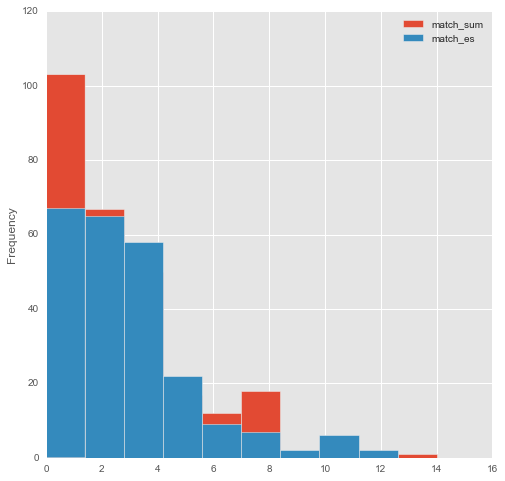

In [128]:
#female dataset
df_female_condensed[ ['match_sum', 'match_es'] ].plot(kind = 'hist', figsize = (8, 8))

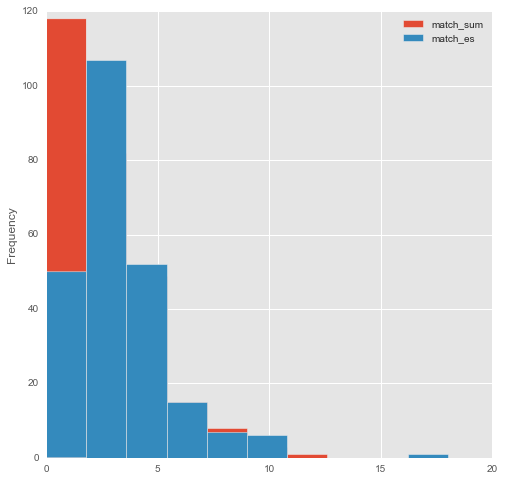

In [129]:
#male data
df_male_condensed[ ['match_sum', 'match_es'] ].plot(kind = 'hist', figsize = (8, 8))

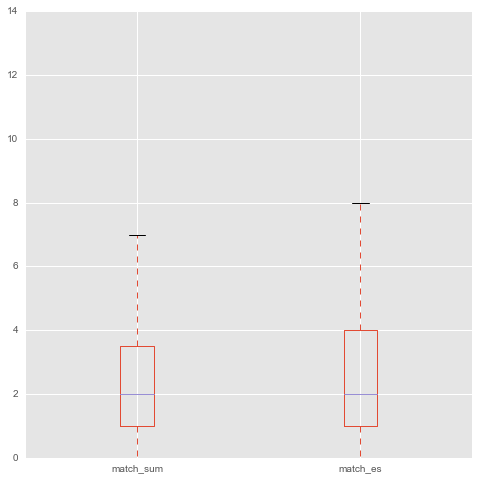

In [130]:
#female dataset 
df_female_condensed[ ['match_sum', 'match_es'] ].plot(kind = 'box', figsize = (8, 8))

In [131]:
df_female_condensed[ ['match_sum', 'match_es'] ].describe()

,match_sum,match_es
count,271.000000,238.000000
mean,2.535055,2.892857
std,2.359706,2.375613
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.500000,4.000000
max,14.000000,12.000000


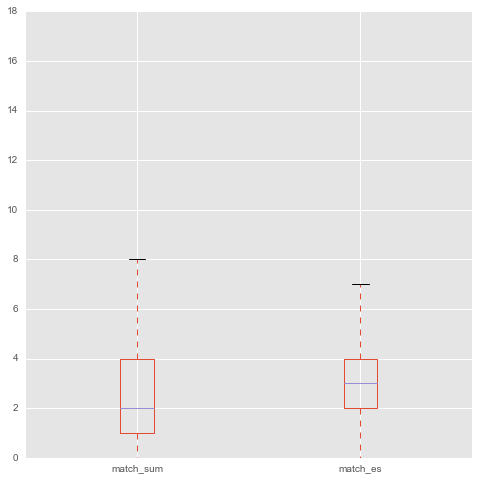

In [132]:
#male dataset 
df_male_condensed[ ['match_sum', 'match_es'] ].plot(kind = 'box', figsize = (8, 8))

In [133]:
df_male_condensed[ ['match_sum', 'match_es'] ].describe()

,match_sum,match_es
count,276.000000,238.000000
mean,2.467391,3.178151
std,2.199757,2.319525
min,0.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,3.000000
75%,4.000000,4.000000
max,11.000000,18.000000


> Observations: on average, males overshot the # of matches they beleive they got; women were more accurate 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1210be4d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1215de210>]], dtype=object)

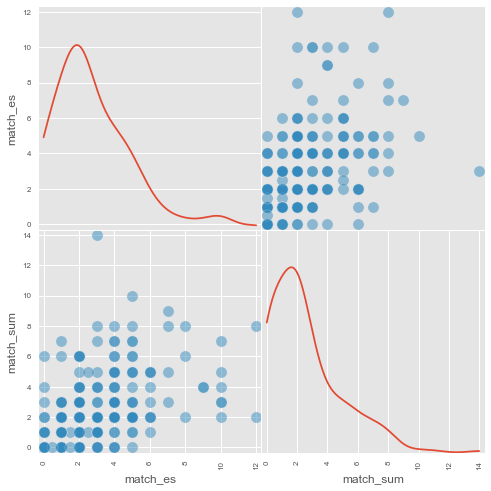

In [134]:
#female df
pd.tools.plotting.scatter_matrix(df_female_condensed[ ['match_es', 'match_sum'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121709250>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121acc810>]], dtype=object)

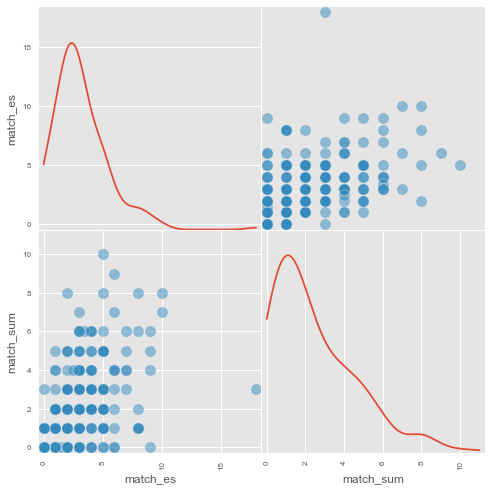

In [135]:
#male df
pd.tools.plotting.scatter_matrix(df_male_condensed[ ['match_es', 'match_sum'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

### Look at ike_o_ave & attr_o_ave 
(had a correlation of: 0.856744 for females)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121372790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12207f650>]], dtype=object)

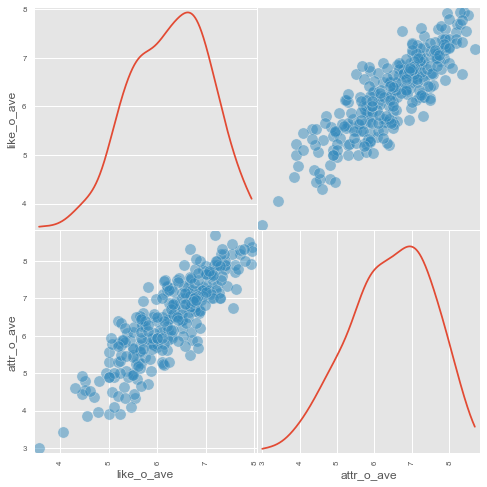

In [136]:
#female DF
pd.tools.plotting.scatter_matrix(df_female_condensed[ ['like_o_ave', 'attr_o_ave'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

> Observations: the more attractive a man found a woman he met with, the higher 'like' rating he gave her

### Like_o_ave, attr_o_ave and dec_o_sum:

On female dataset; as other, these results refer to what men think of the women they met with

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12217d590>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12179e190>]], dtype=object)

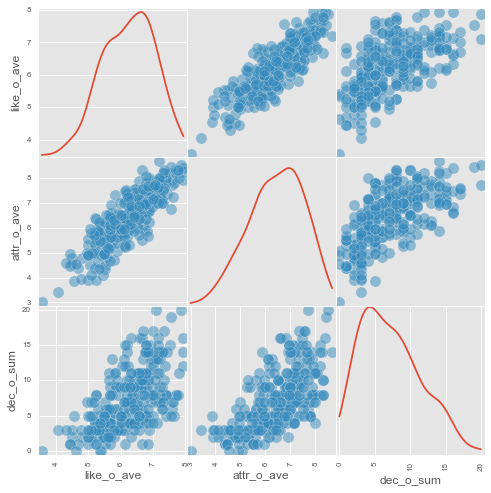

In [137]:
#female DF
pd.tools.plotting.scatter_matrix(df_female_condensed[ ['like_o_ave', 'attr_o_ave', 'dec_o_sum'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

> Observations: the more 'attractive' a male found his female parter, the higher 'liked' she was, resulting in higher 'yes's'  (more linear)

***Look at Male DF***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12296c3d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12308e590>]], dtype=object)

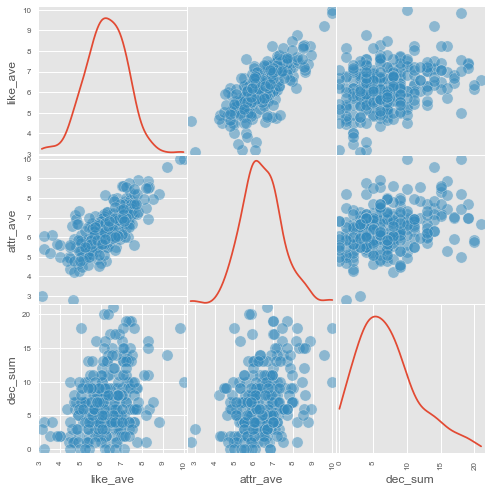

In [138]:
pd.tools.plotting.scatter_matrix(df_male_condensed[ ['like_ave', 'attr_ave', 'dec_sum'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

>Observations look skewed from viewing women's DF re. men's choices

### Like_ave, attr_ave and dec_sum:  

On female dataset; how females view the males they met with

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1232fe7d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123c0e490>]], dtype=object)

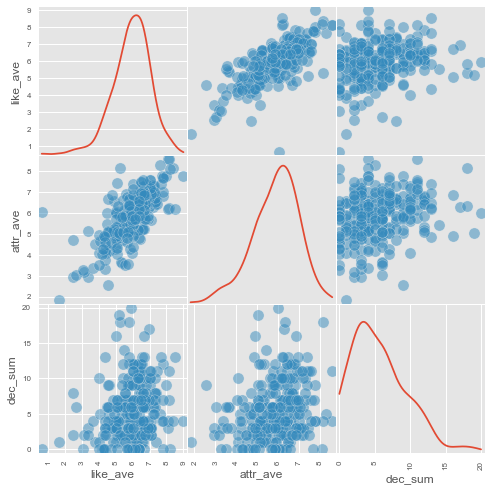

In [139]:
pd.tools.plotting.scatter_matrix(df_female_condensed[ ['like_ave', 'attr_ave', 'dec_sum'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

### match_sum ~ attr_oPercveMe_1 

View relationship between how subject views their 'attractivness' in the eyes of others to match_sum

***FEMALES:***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123d38fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12436be90>]], dtype=object)

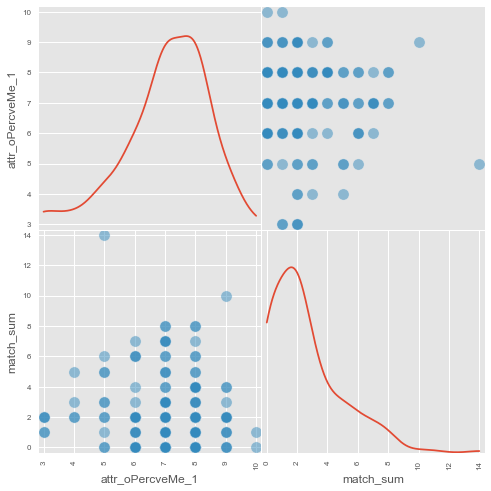

In [140]:
#match_sum ~ attr_oPercveMe_1 for Females
pd.tools.plotting.scatter_matrix(df_female_condensed[ ['attr_oPercveMe_1', 'match_sum'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12460b290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1250b2950>]], dtype=object)

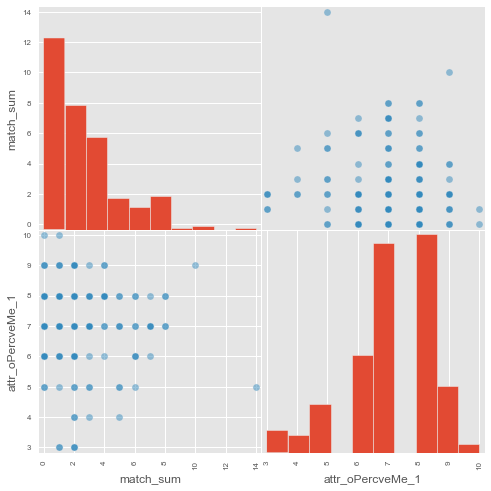

In [141]:
pd.tools.plotting.scatter_matrix(df_female_condensed[ ['match_sum', 'attr_oPercveMe_1'] ], s = 200, figsize = (8, 8))

>Observations: not much correlation

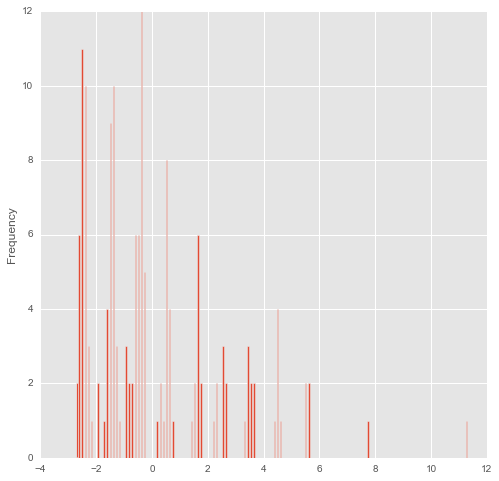

In [142]:
model = smf.ols(formula = 'match_sum ~ attr_oPercveMe_1', data = df_female_condensed).fit()

model.resid.plot(kind = 'hist', bins = 250, figsize = (8, 8))

plt.show()

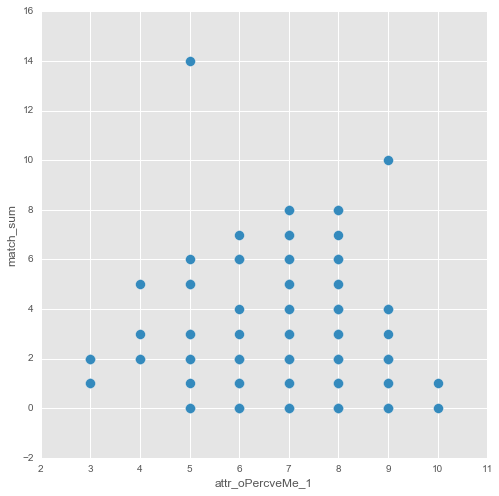

In [143]:
#scatter plot; independent variable vs the outcome variable

df_female_condensed[ ['attr_oPercveMe_1', 'match_sum'] ].plot(kind = 'scatter', x = 'attr_oPercveMe_1', y = 'match_sum', s = 100, figsize = (8, 8))

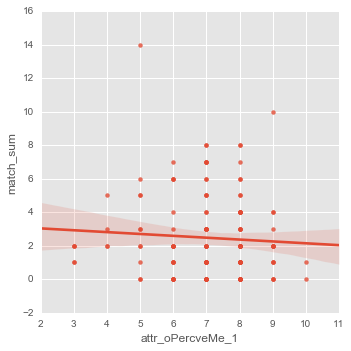

In [144]:
sns.lmplot(x = 'attr_oPercveMe_1', y = 'match_sum', data = df_female_condensed)

#### match_sum ~ attr_iRateMe_exp

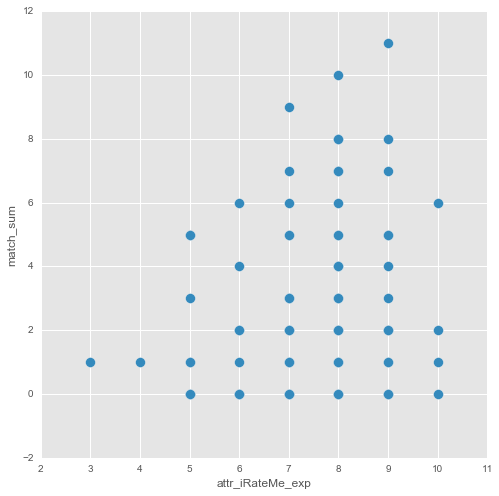

In [145]:
#looking at match_sum & attr_iRateMe_exp (during experiment, subject rates their attributes)
df_female_condensed.plot(kind = 'scatter', x = 'attr_iRateMe_exp', y = 'match_sum', s = 100, figsize = (8, 8))

***MALES:***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12639b3d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x126614550>]], dtype=object)

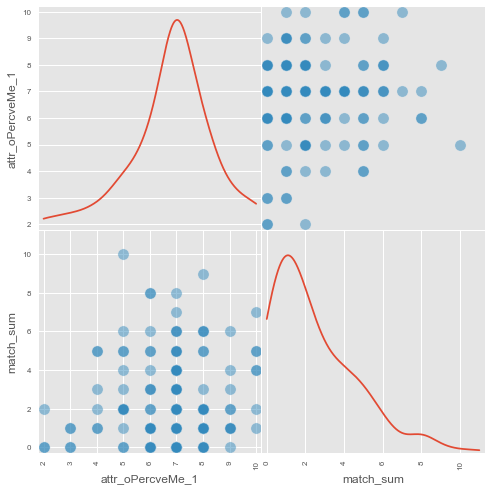

In [146]:
#match_sum ~ attr_oPercveMe_1 for males
pd.tools.plotting.scatter_matrix(df_male_condensed[ ['attr_oPercveMe_1', 'match_sum'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125c5a950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x125767d90>]], dtype=object)

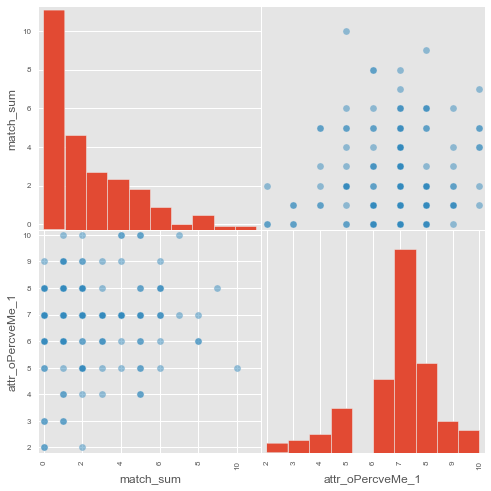

In [147]:
pd.tools.plotting.scatter_matrix(df_male_condensed[ ['match_sum', 'attr_oPercveMe_1'] ], s = 200, figsize = (8, 8))

### dec_match_ave ~ attr_oPercveMe_1

***FEMALES:***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125954ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x125c6b6d0>]], dtype=object)

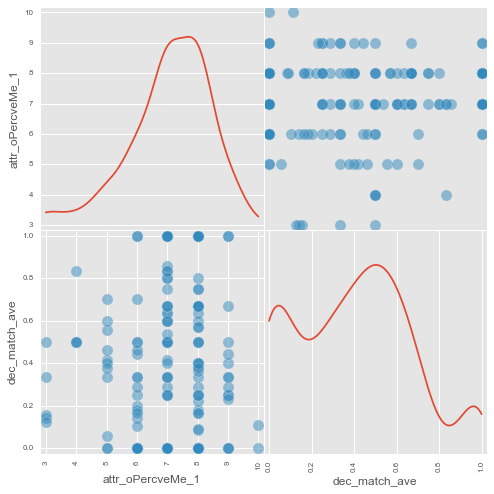

In [148]:
pd.tools.plotting.scatter_matrix(df_female_condensed[ ['attr_oPercveMe_1', 'dec_match_ave'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

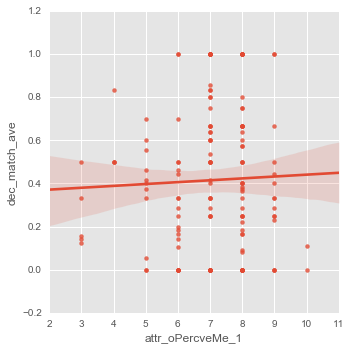

In [149]:
sns.lmplot(x = 'attr_oPercveMe_1', y = 'dec_match_ave', data = df_female_condensed)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126992ed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x128014710>]], dtype=object)

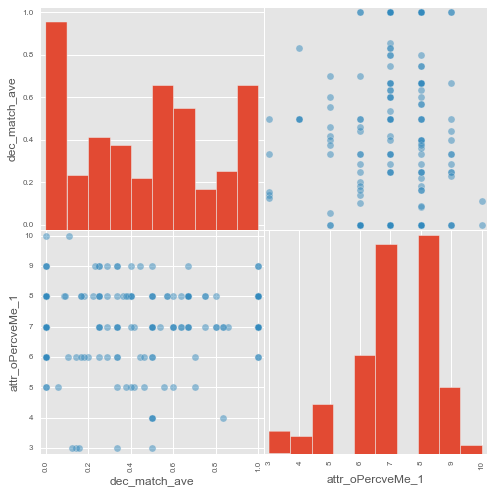

In [150]:
pd.tools.plotting.scatter_matrix(df_female_condensed[ ['dec_match_ave', 'attr_oPercveMe_1'] ], s = 200, figsize = (8, 8))

***MALES:***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12818ea50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12862c110>]], dtype=object)

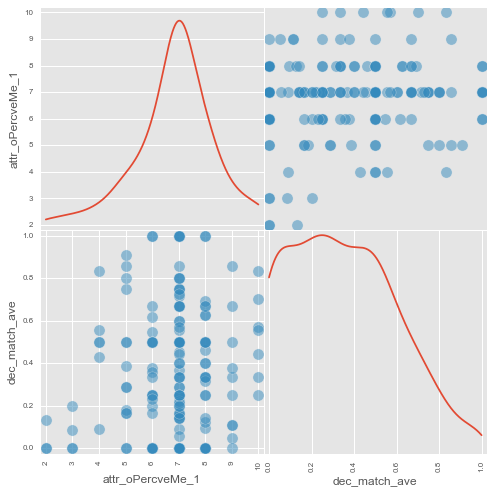

In [151]:
### dec_match_ave ~ attr_oPercveMe_1
pd.tools.plotting.scatter_matrix(df_male_condensed[ ['attr_oPercveMe_1', 'dec_match_ave'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

### match_sum ~ attr_oPercveMe_2 

***FEMALES:***

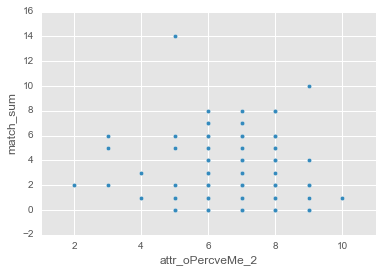

In [152]:
df_female_condensed.plot(kind = 'scatter', x = 'attr_oPercveMe_2', y = 'match_sum')

***MALES:***

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1289df2d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x128c55650>]], dtype=object)

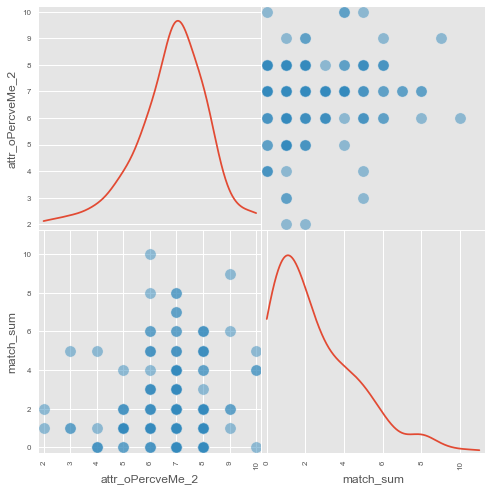

In [153]:
pd.tools.plotting.scatter_matrix(df_male_condensed[ ['attr_oPercveMe_2', 'match_sum'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

### Relationship between attr_oPercveMe_1 & attr_oPercveMe_2:

Looking at how a subject perceive themselves as attractive at different parts of the experiment (before/after)


***FEMALES:***

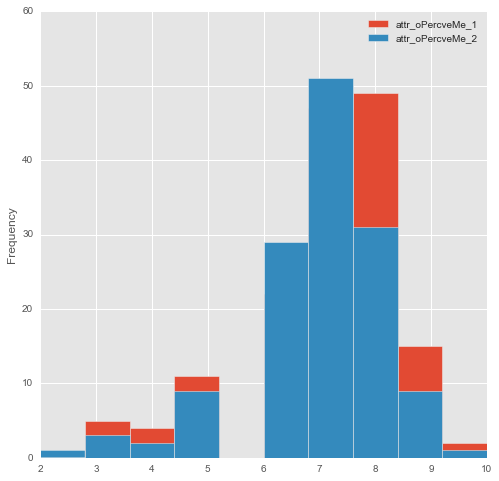

In [154]:
#females

#looking at how females perceive themselves as attractive at diff parts of the experiment (before/after)
df_female_condensed[ ['attr_oPercveMe_1', 'attr_oPercveMe_2'] ].plot(kind = 'hist', figsize = (8, 8))

In [155]:
df_female_condensed[['attr_oPercveMe_1','attr_oPercveMe_2']].describe() 

,attr_oPercveMe_1,attr_oPercveMe_2
count,155.000000,136.000000
mean,7.058065,6.867647
std,1.415309,1.304175
min,3.000000,2.000000
25%,6.000000,6.000000
50%,7.000000,7.000000
75%,8.000000,8.000000
max,10.000000,10.000000


>Observations: average mean score went down after experiment

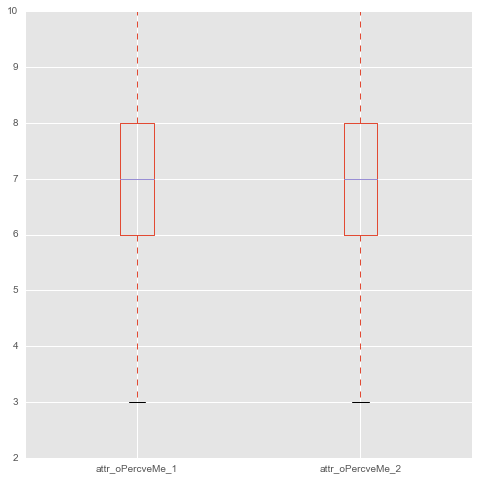

In [156]:
#female dataset 
df_female_condensed[ ['attr_oPercveMe_1', 'attr_oPercveMe_2'] ].plot(kind = 'box', figsize = (8, 8))

***MALES:***

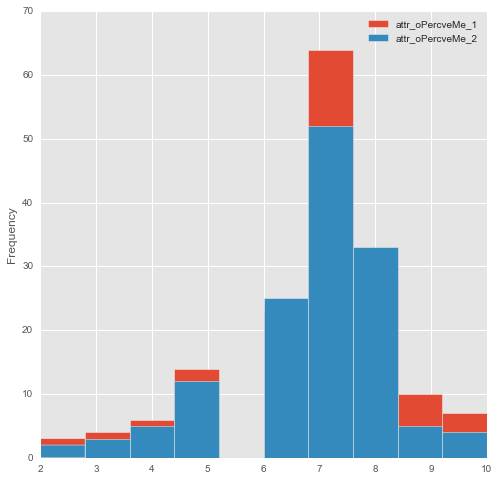

In [157]:
#males

#looking at how males perceive themselves as attractive at diff parts of the experiment (before/after)
df_male_condensed[ ['attr_oPercveMe_1', 'attr_oPercveMe_2'] ].plot(kind = 'hist', figsize = (8, 8))

In [158]:
df_male_condensed[['attr_oPercveMe_1','attr_oPercveMe_2']].describe() 

,attr_oPercveMe_1,attr_oPercveMe_2
count,159.000000,141.000000
mean,6.805031,6.780142
std,1.585049,1.459414
min,2.000000,2.000000
25%,6.000000,6.000000
50%,7.000000,7.000000
75%,8.000000,8.000000
max,10.000000,10.000000


### Viewing data for all self ratings of 'attractivness' 

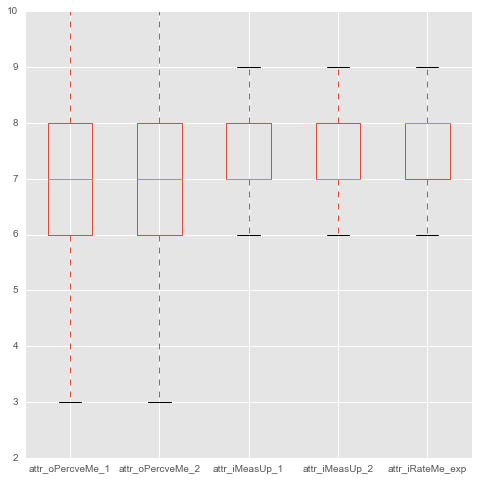

In [159]:
#female dataset 
df_female_condensed[ ['attr_oPercveMe_1', 'attr_oPercveMe_2', 'attr_iMeasUp_1',  'attr_iMeasUp_2', 'attr_iRateMe_exp'] ].plot(kind = 'box', figsize = (8, 8))

> Observations: mean is the same but the descrepency in scores is larger; 25% of the scores women give themselves whehn seeing how others perceive themselves is lower than when they rate their attractiveness compared to what they think men want

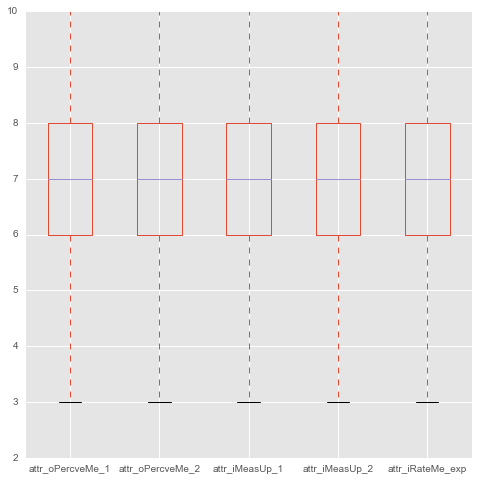

In [160]:
#male dataset 
df_male_condensed[ ['attr_oPercveMe_1', 'attr_oPercveMe_2', 'attr_iMeasUp_1',  'attr_iMeasUp_2', 'attr_iRateMe_exp'] ].plot(kind = 'box', figsize = (8, 8))

> Observations: males on the other hand are much more consistant when rating their level of 'attractivness'

### How men/women perceive their level of 'attraction' compared to how others view  

e.g. Relationship between attr_oPercveMe_1  (how subject thinks others view them) & attr_o_ave (how partners viewed them in experiment) 

***FEMALES:***

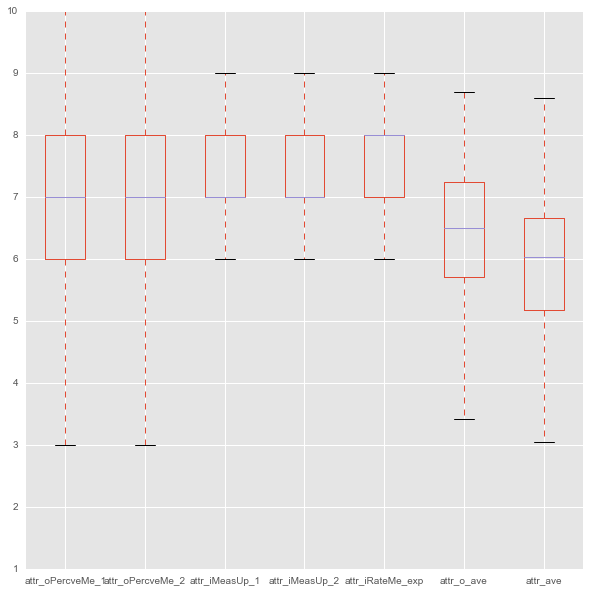

In [161]:
#female dataset 
df_female_condensed[ ['attr_oPercveMe_1', 'attr_oPercveMe_2', 'attr_iMeasUp_1',  'attr_iMeasUp_2', 'attr_iRateMe_exp', 'attr_o_ave', 'attr_ave'] ].plot(kind = 'box', figsize = (10, 10))

>Observations: women view themselves as more attractive than men see them as; women view men as less attractive on average than women 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129f91dd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12a49e350>]], dtype=object)

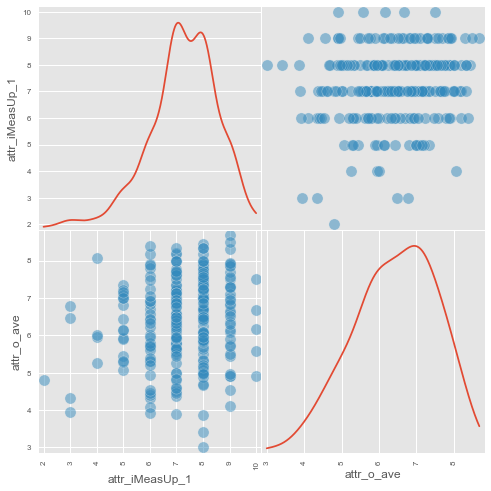

In [162]:
pd.tools.plotting.scatter_matrix(df_female_condensed[ ['attr_iMeasUp_1', 'attr_o_ave'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

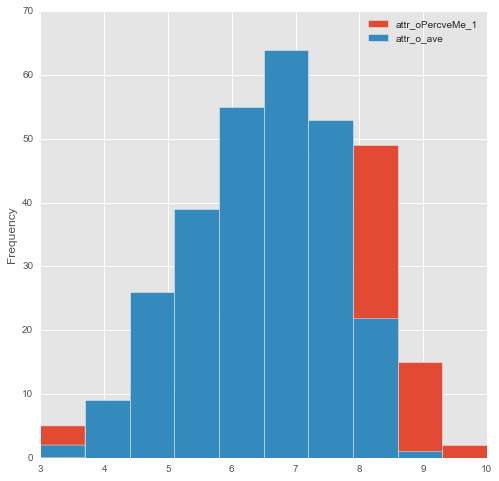

In [163]:
#histograms

#looking at how subject perceives themselves vs. how other's perceive them 
df_female_condensed[ ['attr_oPercveMe_1', 'attr_o_ave'] ].plot(kind = 'hist', figsize = (8, 8))

***MALES:***

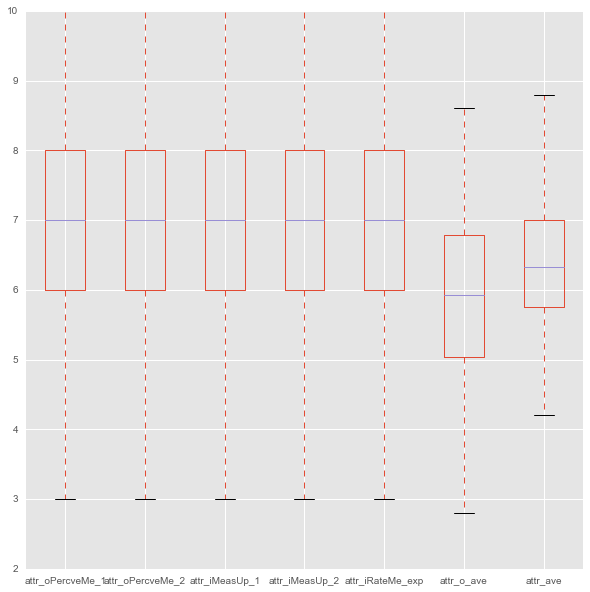

In [164]:
#male dataset 
df_male_condensed[ ['attr_oPercveMe_1', 'attr_oPercveMe_2', 'attr_iMeasUp_1',  'attr_iMeasUp_2', 'attr_iRateMe_exp', 'attr_o_ave', 'attr_ave'] ].plot(kind = 'box', figsize = (10, 10))

>Observations: men are extremely consistant when it comes to rating their level of 'attractivness'. men also view women as less attractive on average; and women view them as less attractive than they see themselves as

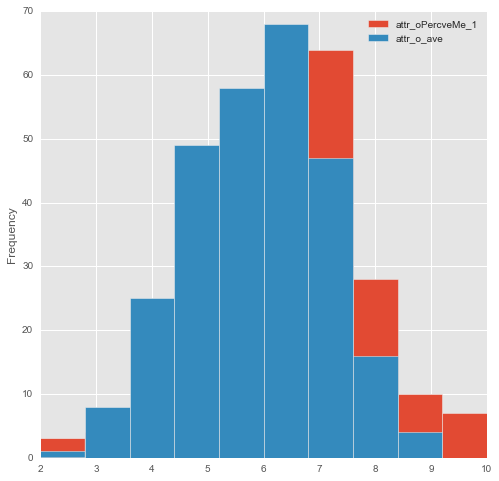

In [165]:
#histograms

#looking at how subject perceives themselves vs. how other's perceive them 
df_male_condensed[ ['attr_oPercveMe_1', 'attr_o_ave'] ].plot(kind = 'hist', figsize = (8, 8))

In [166]:
df_female_condensed.dec_match_ave.value_counts()

0.000000    52
1.000000    39
0.500000    33
0.666667    20
0.333333    16
0.250000    13
0.600000     9
0.400000     7
0.833333     6
0.285714     5
0.800000     5
0.375000     4
0.750000     4
0.222222     4
0.714286     4
0.142857     4
0.166667     4
0.700000     3
0.571429     3
0.636364     3
0.857143     3
0.200000     2
0.461538     2
0.444444     2
0.181818     2
0.111111     2
0.416667     2
0.090909     2
0.875000     1
0.625000     1
0.555556     1
0.125000     1
0.300000     1
0.230769     1
0.153846     1
0.384615     1
0.470588     1
0.888889     1
0.055556     1
0.363636     1
0.538462     1
0.083333     1
0.105263     1
0.583333     1
Name: dec_match_ave, dtype: int64

In [167]:
df_female_condensed.match_sum.value_counts()

2     67
0     52
1     51
3     33
5     17
4     17
6     12
7     10
8      8
14     1
11     1
10     1
9      1
Name: match_sum, dtype: int64

# STARTING TESTING HERE



# Models

In [234]:
#dropping nan values in female df

subsetdf_OPME1 = df_female_condensed.dropna(axis = 'index', subset = ['attr_oPercveMe_1', 'sinc_oPercveMe_1', 'intel_oPercveMe_1', 'fun_oPercveMe_1','amb_oPercveMe_1',
                                                                      'attr_oPercveMe_2', 'sinc_oPercveMe_2', 'intel_oPercveMe_2', 'fun_oPercveMe_2','amb_oPercveMe_2',
                                                                      'attr_o_ave', 'intel_o_ave', 'sinc_o_ave','fun_o_ave', 'amb_o_ave', 
                                                                      'match_sum', 'dec_sum', 'dec_o_sum', 'dec_match_ave', 'match_es', 'match_es',
                                                                      'attr_iMeasUp_1', 'sinc_iMeasUp_1', 'intel_iMeasUp_1', 'fun_iMeasUp_1','amb_iMeasUp_1',
                                                                      'attr_iMeasUp_2', 'sinc_iMeasUp_2', 'intel_iMeasUp_2', 'fun_iMeasUp_2','amb_iMeasUp_2',
                                                                      'attr_iRateMe_exp', 'intel_iRateMe_exp', 'fun_iRateMe_exp','amb_iRateMe_exp', 'sinc_iRateMe_exp',
                                                                     ])

In [206]:
train_df_female = subsetdf_OPME1.sample(frac = .6, random_state = 1)
test_df_female =subsetdf_OPME1.drop(train_df_female.index)

In [ ]:
train_X = train_df[ ['attr_oPercveMe_1', 'fun_oPercveMe_1'] ]
train_y = train_df.match_sum

model = linear_model.LinearRegression()
cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

## y = match_sum:

### match_sum ~ attr_oPercveMe_1 + intel_oPercveMe_1 + fun_oPercveMe_1 + amb_oPercveMe_1 + sinc_oPercveMe_1

In [169]:
## Look at match_sum ~ female attrbiute ratings for self('how subject perceives themselves) - all surveys 

model = smf.ols(formula = 'match_sum ~ attr_oPercveMe_1 + intel_oPercveMe_1 + fun_oPercveMe_1 + amb_oPercveMe_1 + sinc_oPercveMe_1', data = subsetdf_OPME1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              match_sum   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.070
Method:                 Least Squares   F-statistic:                   0.04018
Date:                Mon, 11 Jul 2016   Prob (F-statistic):              0.999
Time:                        21:46:45   Log-Likelihood:                -164.47
No. Observations:                  74   AIC:                             340.9
Df Residuals:                      68   BIC:                             354.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             1.9976      2.025      0.987      0.327        -2.042     6.038
attr_oPercveMe_1     -0.0154      0.230     -0.067      0.947        -0.474     0.443
intel_oPercveMe_1     0.0496      0.316      0.157      0.876        -0.582     0.681
fun_oPercveMe_1       0.0388      0.192      0.202      0.841        -0.345     0.422
amb_oPercveMe_1      -0.0586      0.198     -0.296      0.768        -0.454     0.337
sinc_oPercveMe_1      0.0389      0.239      0.163      0.871        -0.437     0.515
==============================================================================
Omnibus:                       17.575   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.783
Skew:                           1.187   Prob(JB):                     3.07e-05
Kurtosis:                       4.051   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
#drop a few features 
#model = smf.ols(formula = 'match_sum ~ attr_oPercveMe_1 + intel_oPercveMe_1 + fun_oPercveMe_1 + amb_oPercveMe_1 + sinc_oPercveMe_1', data = subsetdf_OPME1).fit()

#model.summary()

### match_sum ~ 0 + attr_oPercveMe_1

*forcing intercept to 0*

In [171]:
#forcing intercept to 0
model = smf.ols(formula = 'match_sum ~ 0 + attr_oPercveMe_1', data = subsetdf_OPME1).fit()

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              match_sum   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     80.89
Date:                Mon, 11 Jul 2016   Prob (F-statistic):           1.91e-13
Time:                        21:46:45   Log-Likelihood:                -166.08
No. Observations:                  74   AIC:                             334.2
Df Residuals:                      73   BIC:                             336.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
attr_oPercveMe_1     0.3344      0.037      8.994      0.000         0.260     0.408
==============================================================================
Omnibus:                       12.993   Durbin-Watson:                   1.451
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.250
Skew:                           1.056   Prob(JB):                     0.000805
Kurtosis:                       3.397   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

match_sum = 0.3344 * attr_oPercveMe_1 [1pt]

### Drop outliers

In [200]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', len(df)

    Q1 = df.match_sum.quantile(.25)
    Q2 = df.match_sum.quantile(.5)
    Q3 = df.match_sum.quantile(.75)
    IQR = Q3 - Q1

    print '- Q1         =', Q1, '($M)'
    print '- Q2/Median  =', Q2, '($M)'
    print '- Q3         =', Q3, '($M)'

    df.drop(df[(df.match_sum < Q1 - 1.5 * IQR) | (df.match_sum > Q3 + 1.5 * IQR)].index, inplace = True)

    print '- n (after)  =', len(df)


In [202]:

print 'With outliers:'
print '- match_sum ~   attr_oPercveMe_1; R^2 =', smf.ols(formula = 'match_sum ~ attr_oPercveMe_1', data = subsetdf_OPME1).fit().rsquared
print '- match_sum ~  0 +  attr_oPercveMe_1; R^2 =', smf.ols(formula = 'match_sum ~  0 + attr_oPercveMe_1', data = subsetdf_OPME1).fit().rsquared

print
drop_outliers(subsetdf_OPME1) # dropping outliers (function defined above)
print

print 'Without outliers:'
print '- match_sum ~   attr_oPercveMe_1; R^2 =', smf.ols(formula = 'match_sum ~ attr_oPercveMe_1', data = subsetdf_OPME1).fit().rsquared
print '- match_sum ~  0 + attr_oPercveMe_1; R^2 =', smf.ols(formula = 'match_sum ~  0 + attr_oPercveMe_1', data = subsetdf_OPME1).fit().rsquared

With outliers:
- match_sum ~   attr_oPercveMe_1; R^2 = 0.0110540459113
- match_sum ~  0 +  attr_oPercveMe_1; R^2 = 0.537426850988

Dropping outliers
- n (before) = 71
- Q1         = 1.0 ($M)
- Q2/Median  = 2.0 ($M)
- Q3         = 3.0 ($M)
- n (after)  = 69

Without outliers:
- match_sum ~   attr_oPercveMe_1; R^2 = 0.00744987782719
- match_sum ~  0 + attr_oPercveMe_1; R^2 = 0.553208715917


/Users/Miranda/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### match_sum ~ amb_iRateMe_exp + amb_iMeasUp_2 

In [181]:
model = smf.ols(formula = 'match_sum ~ amb_iRateMe_exp + amb_iMeasUp_2' , data = subsetdf_OPME1).fit()

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              match_sum   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.7712
Date:                Mon, 11 Jul 2016   Prob (F-statistic):              0.466
Time:                        22:04:48   Log-Likelihood:                -163.78
No. Observations:                  74   AIC:                             333.6
Df Residuals:                      71   BIC:                             340.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           3.5907      1.155      3.109      0.003         1.288     5.893
amb_iRateMe_exp     0.1312      0.255      0.515      0.608        -0.377     0.639
amb_iMeasUp_2      -0.2877      0.271     -1.060      0.293        -0.829     0.253
==============================================================================
Omnibus:                       15.629   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.696
Skew:                           1.081   Prob(JB):                     0.000144
Kurtosis:                       4.034   Cond. No.                         46.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

match_sum = 3.59 + .131 * amb_iRateMe_exp[1pt]  + (-.2877) * amb_iMeasUp_2[1pt]

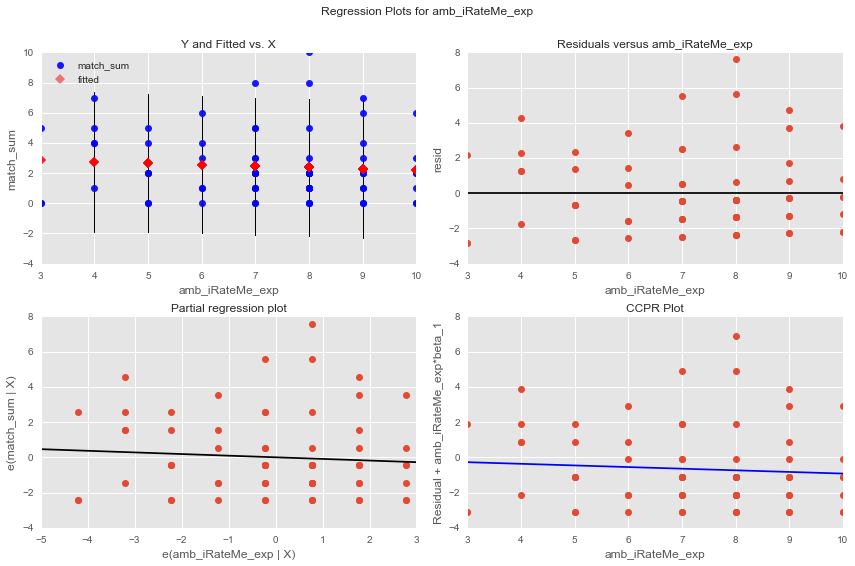

In [193]:
figure = plt.figure(figsize = (12, 8))
figure = sm.graphics.plot_regress_exog(model, 'amb_iRateMe_exp', fig = figure)

In [196]:
model = smf.ols(formula = 'match_sum ~ attr_iRateMe_exp + attr_iMeasUp_2' , data = subsetdf_OPME1).fit()

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              match_sum   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     4.007
Date:                Mon, 11 Jul 2016   Prob (F-statistic):             0.0224
Time:                        22:49:39   Log-Likelihood:                -160.62
No. Observations:                  74   AIC:                             327.2
Df Residuals:                      71   BIC:                             334.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            1.4569      1.587      0.918      0.362        -1.708     4.622
attr_iRateMe_exp     0.8567      0.303      2.823      0.006         0.252     1.462
attr_iMeasUp_2      -0.7218      0.348     -2.076      0.042        -1.415    -0.028
==============================================================================
Omnibus:                       14.543   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.463
Skew:                           0.970   Prob(JB):                     0.000266
Kurtosis:                       4.255   Cond. No.                         65.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### match_sum ~ amb_iRateMe_exp 

In [186]:
model = smf.ols(formula = 'match_sum ~ amb_iRateMe_exp ' , data = subsetdf_OPME1).fit()

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              match_sum   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.4178
Date:                Mon, 11 Jul 2016   Prob (F-statistic):              0.520
Time:                        22:41:47   Log-Likelihood:                -164.36
No. Observations:                  74   AIC:                             332.7
Df Residuals:                      72   BIC:                             337.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           3.1123      1.064      2.925      0.005         0.991     5.233
amb_iRateMe_exp    -0.0923      0.143     -0.646      0.520        -0.377     0.192
==============================================================================
Omnibus:                       17.523   Durbin-Watson:                   1.511
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.730
Skew:                           1.172   Prob(JB):                     3.15e-05
Kurtosis:                       4.109   Cond. No.                         30.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

>obervations: better with amb_iMeasUp_2

### match_sum ~ attr_oPercveMe_2 + attr_iMeasUp_2

In [198]:
model = smf.ols(formula = 'match_sum ~ attr_oPercveMe_2 + attr_iMeasUp_2', data = subsetdf_OPME1).fit()

model.summary()  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              match_sum   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                   0.02096
Date:                Mon, 11 Jul 2016   Prob (F-statistic):              0.979
Time:                        22:51:37   Log-Likelihood:                -164.56
No. Observations:                  74   AIC:                             335.1
Df Residuals:                      71   BIC:                             342.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            2.1019      1.734      1.212      0.229        -1.355     5.559
attr_oPercveMe_2     0.0088      0.403      0.022      0.983        -0.795     0.813
attr_iMeasUp_2       0.0394      0.395      0.100      0.921        -0.748     0.827
==============================================================================
Omnibus:                       16.635   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.246
Skew:                           1.161   Prob(JB):                     6.62e-05
Kurtosis:                       3.922   Cond. No.                         66.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### match_sum ~ attr_oPercveMe_2 + attr_iMeasUp_2 + attr_iMeasUp_1 + attr_oPercveMe_1

In [199]:
model = smf.ols(formula = 'match_sum ~ attr_oPercveMe_2 + attr_iMeasUp_2 + attr_iMeasUp_1 + attr_oPercveMe_1', data = subsetdf_OPME1).fit()

model.summary()  



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              match_sum   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.1493
Date:                Mon, 11 Jul 2016   Prob (F-statistic):              0.963
Time:                        22:51:59   Log-Likelihood:                -164.26
No. Observations:                  74   AIC:                             338.5
Df Residuals:                      69   BIC:                             350.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            1.9067      1.786      1.068      0.289        -1.655     5.469
attr_oPercveMe_2     0.0592      0.452      0.131      0.896        -0.842     0.960
attr_iMeasUp_2      -0.0674      0.436     -0.155      0.878        -0.937     0.802
attr_iMeasUp_1       0.2475      0.338      0.732      0.467        -0.427     0.922
attr_oPercveMe_1    -0.1679      0.336     -0.499      0.619        -0.839     0.503
==============================================================================
Omnibus:                       15.784   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.951
Skew:                           1.139   Prob(JB):                     0.000126
Kurtosis:                       3.795   Cond. No.                         96.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### match_sum ~ attr_oPercveMe_2 + attr_iMeasUp_2 + attr_iMeasUp_1  + attr_oPercveMe_1

In [185]:
model = smf.ols(formula = 'match_sum ~ attr_oPercveMe_2 + attr_iMeasUp_2 +attr_iMeasUp_1  + attr_oPercveMe_1' , data = subsetdf_OPME1).fit()

model.summary()   


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              match_sum   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.049
Method:                 Least Squares   F-statistic:                    0.1493
Date:                Mon, 11 Jul 2016   Prob (F-statistic):              0.963
Time:                        22:08:15   Log-Likelihood:                -164.26
No. Observations:                  74   AIC:                             338.5
Df Residuals:                      69   BIC:                             350.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            1.9067      1.786      1.068      0.289        -1.655     5.469
attr_oPercveMe_2     0.0592      0.452      0.131      0.896        -0.842     0.960
attr_iMeasUp_2      -0.0674      0.436     -0.155      0.878        -0.937     0.802
attr_iMeasUp_1       0.2475      0.338      0.732      0.467        -0.427     0.922
attr_oPercveMe_1    -0.1679      0.336     -0.499      0.619        -0.839     0.503
==============================================================================
Omnibus:                       15.784   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.951
Skew:                           1.139   Prob(JB):                     0.000126
Kurtosis:                       3.795   Cond. No.                         96.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### match_sum ~ like_o_ave + attr_o_ave

In [184]:
model = smf.ols(formula = 'match_sum ~ like_o_ave + attr_o_ave', data = subsetdf_OPME1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              match_sum   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     6.745
Date:                Mon, 11 Jul 2016   Prob (F-statistic):            0.00208
Time:                        22:08:06   Log-Likelihood:                -158.14
No. Observations:                  74   AIC:                             322.3
Df Residuals:                      71   BIC:                             329.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -4.9053      2.123     -2.310      0.024        -9.139    -0.672
like_o_ave     0.6989      0.560      1.248      0.216        -0.418     1.816
attr_o_ave     0.4534      0.430      1.053      0.296        -0.405     1.312
==============================================================================
Omnibus:                        5.920   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.941
Skew:                           0.690   Prob(JB):                       0.0513
Kurtosis:                       2.851   Cond. No.                         81.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### match_sum ~ attr_o_ave + fun_o_ave

In [172]:
model = smf.ols(formula = 'match_sum ~ attr_o_ave + fun_o_ave ', data = subsetdf_OPME1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              match_sum   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     6.877
Date:                Mon, 11 Jul 2016   Prob (F-statistic):            0.00186
Time:                        21:46:45   Log-Likelihood:                -158.03
No. Observations:                  74   AIC:                             322.1
Df Residuals:                      71   BIC:                             329.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -4.1081      1.784     -2.303      0.024        -7.665    -0.551
attr_o_ave     0.5305      0.369      1.439      0.155        -0.205     1.266
fun_o_ave      0.4906      0.367      1.336      0.186        -0.242     1.223
==============================================================================
Omnibus:                        8.635   Durbin-Watson:                   1.402
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.683
Skew:                           0.835   Prob(JB):                       0.0130
Kurtosis:                       3.174   Cond. No.                         68.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
model = smf.ols(formula = 'match_sum ~ 0 +attr_o_ave + fun_o_ave *  attr_oPercveMe_2', data = subsetdf_OPME1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              match_sum   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     28.68
Date:                Tue, 12 Jul 2016   Prob (F-statistic):           4.78e-14
Time:                        19:00:25   Log-Likelihood:                -155.63
No. Observations:                  73   AIC:                             319.3
Df Residuals:                      69   BIC:                             328.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
attr_o_ave                     0.5058      0.366      1.382      0.171        -0.224     1.236
fun_o_ave                     -0.1194      0.422     -0.283      0.778        -0.962     0.723
attr_oPercveMe_2              -0.6597      0.259     -2.544      0.013        -1.177    -0.142
fun_o_ave:attr_oPercveMe_2     0.1023      0.050      2.055      0.044         0.003     0.202
==============================================================================
Omnibus:                        7.171   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                7.092
Skew:                           0.763   Prob(JB):                       0.0288
Kurtosis:                       3.053   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## y = dec_match_ave:

### dec_match_ave ~ attr_oPercveMe_1 + intel_oPercveMe_1 + fun_oPercveMe_1 + amb_oPercveMe_1 + sinc_oPercveMe_1

In [173]:
model = smf.ols(formula = 'dec_match_ave ~ attr_oPercveMe_1 + intel_oPercveMe_1 + fun_oPercveMe_1 + amb_oPercveMe_1 + sinc_oPercveMe_1', data = subsetdf_OPME1).fit()

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dec_match_ave   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.5065
Date:                Mon, 11 Jul 2016   Prob (F-statistic):              0.770
Time:                        21:46:45   Log-Likelihood:                -20.234
No. Observations:                  74   AIC:                             52.47
Df Residuals:                      68   BIC:                             66.29
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.4952      0.288      1.718      0.090        -0.080     1.070
attr_oPercveMe_1      0.0206      0.033      0.631      0.530        -0.045     0.086
intel_oPercveMe_1     0.0397      0.045      0.880      0.382        -0.050     0.130
fun_oPercveMe_1       0.0029      0.027      0.104      0.917        -0.052     0.057
amb_oPercveMe_1      -0.0238      0.028     -0.843      0.402        -0.080     0.033
sinc_oPercveMe_1     -0.0420      0.034     -1.238      0.220        -0.110     0.026
==============================================================================
Omnibus:                        6.168   Durbin-Watson:                   1.487
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                2.723
Skew:                           0.148   Prob(JB):                        0.256
Kurtosis:                       2.108   Cond. No.                         131.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### dec_match_ave ~ 0+ attr_oPercveMe_1 + sinc_oPercveMe_1 + intel_oPercveMe_1+ fun_oPercveMe_1 + amb_oPercveMe_1

*forcing intercept to 0*

In [174]:
#forcing intercept to 0
model = smf.ols(formula = 'dec_match_ave ~ 0+ attr_oPercveMe_1 + sinc_oPercveMe_1 + intel_oPercveMe_1+ fun_oPercveMe_1 + amb_oPercveMe_1', data = subsetdf_OPME1).fit()

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dec_match_ave   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     26.76
Date:                Mon, 11 Jul 2016   Prob (F-statistic):           6.19e-15
Time:                        21:46:45   Log-Likelihood:                -21.806
No. Observations:                  74   AIC:                             53.61
Df Residuals:                      69   BIC:                             65.13
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
attr_oPercveMe_1      0.0343      0.032      1.065      0.291        -0.030     0.098
sinc_oPercveMe_1     -0.0329      0.034     -0.966      0.337        -0.101     0.035
intel_oPercveMe_1     0.0640      0.043      1.477      0.144        -0.022     0.151
fun_oPercveMe_1       0.0136      0.027      0.504      0.616        -0.040     0.067
amb_oPercveMe_1      -0.0188      0.028     -0.662      0.510        -0.076     0.038
==============================================================================
Omnibus:                        9.031   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                3.236
Skew:                           0.138   Prob(JB):                        0.198
Kurtosis:                       2.013   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### dec_match_ave ~ 0 + attr_oPercveMe_1 + fun_oPercveMe_1 + amb_oPercveMe_1

*forcing intercept to 0*

In [175]:
# remove intel (Which was weak) and then sinc (which was also weak but a bit less so) 

model = smf.ols(formula = 'dec_match_ave ~ 0+ attr_oPercveMe_1 + fun_oPercveMe_1 + amb_oPercveMe_1', data = subsetdf_OPME1).fit()

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dec_match_ave   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     43.76
Date:                Mon, 11 Jul 2016   Prob (F-statistic):           3.98e-16
Time:                        21:46:45   Log-Likelihood:                -22.957
No. Observations:                  74   AIC:                             51.91
Df Residuals:                      71   BIC:                             58.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
attr_oPercveMe_1     0.0495      0.029      1.724      0.089        -0.008     0.107
fun_oPercveMe_1      0.0155      0.026      0.605      0.547        -0.036     0.067
amb_oPercveMe_1     -0.0030      0.024     -0.122      0.903        -0.052     0.046
==============================================================================
Omnibus:                       10.962   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                3.556
Skew:                           0.145   Prob(JB):                        0.169
Kurtosis:                       1.966   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### dec_match_ave ~ 0 +attr_oPercveMe_1 + intel_oPercveMe_1 + amb_oPercveMe_1 + fun_oPercveMe_1

*forcing intercept to 0*

In [179]:
model = smf.ols(formula = 'dec_match_ave ~ 0 + attr_oPercveMe_1 + intel_oPercveMe_1 + amb_oPercveMe_1 + fun_oPercveMe_1' , data = subsetdf_OPME1).fit()

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dec_match_ave   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     33.25
Date:                Mon, 11 Jul 2016   Prob (F-statistic):           1.57e-15
Time:                        21:47:45   Log-Likelihood:                -22.303
No. Observations:                  74   AIC:                             52.61
Df Residuals:                      70   BIC:                             61.82
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
attr_oPercveMe_1      0.0332      0.032      1.032      0.306        -0.031     0.097
intel_oPercveMe_1     0.0368      0.033      1.117      0.268        -0.029     0.103
amb_oPercveMe_1      -0.0192      0.028     -0.676      0.502        -0.076     0.038
fun_oPercveMe_1       0.0083      0.026      0.315      0.753        -0.044     0.061
==============================================================================
Omnibus:                        8.480   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                3.229
Skew:                           0.167   Prob(JB):                        0.199
Kurtosis:                       2.032   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### dec_match_ave ~ 0 + attr_oPercveMe_1 

*forcing intercept to 0*

In [177]:
#forcing intercept to 0
model = smf.ols(formula = 'dec_match_ave ~ 0 + attr_oPercveMe_1', data = subsetdf_OPME1).fit()

model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          dec_match_ave   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     133.8
Date:                Mon, 11 Jul 2016   Prob (F-statistic):           3.55e-18
Time:                        21:46:46   Log-Likelihood:                -23.159
No. Observations:                  74   AIC:                             48.32
Df Residuals:                      73   BIC:                             50.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
attr_oPercveMe_1     0.0623      0.005     11.569      0.000         0.052     0.073
==============================================================================
Omnibus:                       12.486   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                3.687
Skew:                           0.117   Prob(JB):                        0.158
Kurtosis:                       1.932   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multicollinearity

#### Transforming Variables

In [236]:
subsetdf_OPME1[ ['amb_iRateMe_exp_Log', 'amb_iMeasUp_2_Log', 'attr_oPercveMe_1_Log', 
                 'sinc_oPercveMe_1_Log', 'intel_oPercveMe_1_Log', 'fun_oPercveMe_1_Log',
                 'amb_oPercveMe_1_Log', 'attr_iRateMe_exp_Log', 'fun_iRateMe_exp_Log', 'match_es_Log', 'match_es_ave_Log' ] ] = subsetdf_OPME1[ ['amb_iRateMe_exp', 'amb_iMeasUp_2','attr_oPercveMe_1',
                   'sinc_oPercveMe_1', 'intel_oPercveMe_1', 'fun_oPercveMe_1', 
                   'amb_oPercveMe_1', 'attr_iRateMe_exp', 'fun_iRateMe_exp', 'match_es', 'match_es_ave'] ].apply(np.log10)

subsetdf_OPME1[ ['amb_iRateMe_exp_Sqrt', 'amb_iMeasUp_2_Sqrt', 'attr_oPercveMe_1_Sqrt', 
                 'sinc_oPercveMe_1_Sqrt', 'intel_oPercveMe_1_Sqrt', 'fun_oPercveMe_1_Sqrt',
                 'amb_oPercveMe_1_Sqrt', 'attr_iMeasUp_2_Sqrt', 'attr_iMeasUp_1_Sqrt', 'match_es_Sqrt', 'match_es_ave_Sqrt'] ] = subsetdf_OPME1[ ['amb_iRateMe_exp', 'amb_iMeasUp_2','attr_oPercveMe_1',
                   'sinc_oPercveMe_1', 'intel_oPercveMe_1', 'fun_oPercveMe_1', 
                   'amb_oPercveMe_1', 'attr_iMeasUp_2', 'attr_iMeasUp_1', 'match_es', 'match_es_ave'] ].apply(np.sqrt)

subsetdf_OPME1[ ['amb_iRateMe_exp_Square', 'amb_iMeasUp_2_Square', 'attr_oPercveMe_1_Square',
                'sinc_oPercveMe_1_Square', 'intel_oPercveMe_1_Square', 'fun_oPercveMe_1_Square',
                 'amb_oPercveMe_1_Square', 'attr_iMeasUp_2_Square', 'attr_iMeasUp_1_Square', 'match_es_Square', 'match_es_ave_Square'] ] = subsetdf_OPME1[ ['amb_iRateMe_exp', 'amb_iMeasUp_2','attr_oPercveMe_1',
                   'sinc_oPercveMe_1', 'intel_oPercveMe_1', 'fun_oPercveMe_1', 
                   'amb_oPercveMe_1', 'attr_iMeasUp_2', 'attr_iMeasUp_1', 'match_es', 'match_es_ave'] ].apply(np.square)

### match_sum ~ attr_oPercveMe_1_Sqrt + fun_oPercveMe_1_Sqrt + amb_iRateMe_exp_Log + dec_sum

In [220]:
smf.ols(formula = 'match_sum ~ attr_oPercveMe_1_Sqrt + fun_oPercveMe_1_Sqrt + amb_iRateMe_exp_Log + dec_sum', data = subsetdf_OPME1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              match_sum   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     14.83
Date:                Mon, 11 Jul 2016   Prob (F-statistic):           1.25e-08
Time:                        23:35:32   Log-Likelihood:                -111.79
No. Observations:                  69   AIC:                             233.6
Df Residuals:                      64   BIC:                             244.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept                 3.5999      1.847      1.949      0.056        -0.089     7.289
attr_oPercveMe_1_Sqrt    -0.4486      0.598     -0.750      0.456        -1.644     0.747
fun_oPercveMe_1_Sqrt     -0.2285      0.548     -0.417      0.678        -1.323     0.865
amb_iRateMe_exp_Log      -1.6929      1.185     -1.428      0.158        -4.061     0.675
dec_sum                   0.3408      0.046      7.483      0.000         0.250     0.432
==============================================================================
Omnibus:                        0.612   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.736   Jarque-Bera (JB):                0.250
Skew:                          -0.131   Prob(JB):                        0.882
Kurtosis:                       3.137   Cond. No.                         89.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
## Interactions 
formula = 'match_sum ~ attr_iMeasUp_2_Square + attr_iMeasUp_1_Square + attr_oPercveMe_1_Square'
formula += ' + attr_iMeasUp_2_Square * attr_iMeasUp_1_Square * attr_oPercveMe_1_Square'
formula += ' + attr_oPercveMe_1_Square * sinc_oPercveMe_1_Square * intel_oPercveMe_1_Square * fun_oPercveMe_1_Square'
formula += ' + amb_iRateMe_exp_Log * attr_iRateMe_exp_Log * fun_iRateMe_exp_Log'

smf.ols(formula = formula, data = subsetdf_OPME1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              match_sum   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                 -0.160
Method:                 Least Squares   F-statistic:                    0.6646
Date:                Tue, 12 Jul 2016   Prob (F-statistic):              0.870
Time:                        06:33:50   Log-Likelihood:                -121.25
No. Observations:                  69   AIC:                             300.5
Df Residuals:                      40   BIC:                             365.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================================================
                                                                                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                          10.5340    169.304      0.062      0.951      -331.642   352.710
attr_iMeasUp_2_Square                                                                              -0.0300      0.138     -0.217      0.829        -0.309     0.249
attr_iMeasUp_1_Square                                                                              -0.1528      0.165     -0.927      0.359        -0.486     0.180
attr_oPercveMe_1_Square                                                                             0.1437      0.269      0.534      0.596        -0.400     0.688
attr_iMeasUp_2_Square:attr_iMeasUp_1_Square                                                         0.0015      0.003      0.548      0.587        -0.004     0.007
attr_iMeasUp_2_Square:attr_oPercveMe_1_Square                                                      -0.0014      0.003     -0.489      0.627        -0.007     0.005
attr_iMeasUp_1_Square:attr_oPercveMe_1_Square                                                       0.0012      0.003      0.417      0.679        -0.005     0.007
attr_iMeasUp_2_Square:attr_iMeasUp_1_Square:attr_oPercveMe_1_Square                             -3.102e-06   4.57e-05     -0.068      0.946     -9.55e-05  8.93e-05
sinc_oPercveMe_1_Square                                                                            -0.0328      0.417     -0.079      0.938        -0.876     0.810
attr_oPercveMe_1_Square:sinc_oPercveMe_1_Square                                                     0.0018      0.009      0.211      0.834        -0.016     0.019
intel_oPercveMe_1_Square                                                                            0.1357      0.220      0.616      0.542        -0.310     0.581
attr_oPercveMe_1_Square:intel_oPercveMe_1_Square                                                   -0.0022      0.004     -0.500      0.620        -0.011     0.007
sinc_oPercveMe_1_Square:intel_oPercveMe_1_Square                                                   -0.0004      0.005     -0.064      0.949        -0.011     0.011
attr_oPercveMe_1_Square:sinc_oPercveMe_1_Square:intel_oPercveMe_1_Square                        -2.314e-05      0.000     -0.196      0.845        -0.000     0.000
fun_oPercveMe_1_Square                                                                              0.1409      0.160      0.882      0.383        -0.182     0.464
attr_oPercveMe_1_Square:fun_oPercveMe_1_Square                                                     -0.0056      0.005     -1.102   

In [232]:
formula = 'match_sum ~ attr_iMeasUp_2_Square + attr_iMeasUp_1_Square + attr_oPercveMe_1_Square * dec_o_sum'
formula += ' + attr_oPercveMe_1_Log * fun_oPercveMe_1_Log * intel_oPercveMe_1_Log + attr_o_ave * fun_o_ave * intel_o_ave'
formula += ' + attr_oPercveMe_1_Square * sinc_oPercveMe_1_Square * amb_oPercveMe_1_Square * fun_oPercveMe_1_Square + dec_sum'
#formula += ' + amb_iRateMe_exp_Log * attr_iRateMe_exp_Log * fun_iRateMe_exp_Log'

smf.ols(formula = formula, data = subsetdf_OPME1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              match_sum   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     4.965
Date:                Tue, 12 Jul 2016   Prob (F-statistic):           4.89e-06
Time:                        06:39:54   Log-Likelihood:                -72.810
No. Observations:                  69   AIC:                             215.6
Df Residuals:                      34   BIC:                             293.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================
                                                                                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                      -195.2615    123.317     -1.583      0.123      -445.871    55.348
attr_iMeasUp_2_Square                                                                             0.0174      0.014      1.220      0.231        -0.012     0.046
attr_iMeasUp_1_Square                                                                             0.0052      0.015      0.351      0.728        -0.025     0.035
attr_oPercveMe_1_Square                                                                           0.2558      0.305      0.839      0.407        -0.364     0.875
dec_o_sum                                                                                         0.1715      0.189      0.906      0.371        -0.213     0.556
attr_oPercveMe_1_Square:dec_o_sum                                                                 0.0007      0.004      0.209      0.836        -0.007     0.008
attr_oPercveMe_1_Log                                                                            130.9064    136.547      0.959      0.344      -146.591   408.404
fun_oPercveMe_1_Log                                                                             115.0819    142.737      0.806      0.426      -174.996   405.159
attr_oPercveMe_1_Log:fun_oPercveMe_1_Log                                                       -148.1662    176.695     -0.839      0.408      -507.254   210.922
intel_oPercveMe_1_Log                                                                           271.2002    176.877      1.533      0.134       -88.256   630.657
attr_oPercveMe_1_Log:intel_oPercveMe_1_Log                                                     -317.8879    208.604     -1.524      0.137      -741.822   106.046
fun_oPercveMe_1_Log:intel_oPercveMe_1_Log                                                      -320.0519    229.941     -1.392      0.173      -787.348   147.244
attr_oPercveMe_1_Log:fun_oPercveMe_1_Log:intel_oPercveMe_1_Log                                  375.8561    265.997      1.413      0.167      -164.715   916.428
attr_o_ave                                                                                       12.0944     10.500      1.152      0.257        -9.245    33.433
fun_o_ave                                                                                        13.0041     11.093      1.172      0.249        -9.541    35.549
attr_o_ave:fun_o_ave                                                                             -1.7607      1.577     -1.116      0.272        -4.967     1.445
intel

#### match_sum ~ attr_iMeasUp_2_Square + attr_iMeasUp_1_Square + attr_oPercveMe_1_Square * match_es

In [243]:
smf.ols(formula = 'match_sum ~ attr_iMeasUp_2_Square + attr_iMeasUp_1_Square + attr_oPercveMe_1_Square * match_es', data = subsetdf_OPME1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              match_sum   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     7.609
Date:                Tue, 12 Jul 2016   Prob (F-statistic):           1.04e-05
Time:                        18:30:54   Log-Likelihood:                -146.42
No. Observations:                  73   AIC:                             304.8
Df Residuals:                      67   BIC:                             318.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercept                           -0.4542      1.181     -0.385      0.702        -2.811     1.902
attr_iMeasUp_2_Square               -0.0135      0.021     -0.649      0.519        -0.055     0.028
attr_iMeasUp_1_Square                0.0066      0.020      0.327      0.745        -0.034     0.047
attr_oPercveMe_1_Square              0.0321      0.026      1.233      0.222        -0.020     0.084
match_es                             1.1527      0.304      3.792      0.000         0.546     1.759
attr_oPercveMe_1_Square:match_es    -0.0116      0.005     -2.242      0.028        -0.022    -0.001
==============================================================================
Omnibus:                       20.133   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.915
Skew:                           1.014   Prob(JB):                     4.32e-08
Kurtosis:                       5.653   Cond. No.                     1.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [257]:
formula = 'match_sum ~ attr_iMeasUp_2_Square + attr_iMeasUp_1_Square + attr_oPercveMe_1_Square * dec_o_sum * match_es_ave_Square'
formula += ' + attr_oPercveMe_1_Square * fun_oPercveMe_1_Square * intel_oPercveMe_1_Square + attr_o_ave * fun_o_ave * intel_o_ave'
formula += ' + attr_oPercveMe_1_Square * sinc_oPercveMe_1_Square * amb_oPercveMe_1_Square * fun_oPercveMe_1_Square + dec_sum'
#formula += ' + amb_iRateMe_exp_Log * attr_iRateMe_exp_Log * fun_iRateMe_exp_Log'

smf.ols(formula = formula, data = subsetdf_OPME1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              match_sum   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     8.675
Date:                Tue, 12 Jul 2016   Prob (F-statistic):           1.06e-09
Time:                        19:04:14   Log-Likelihood:                -81.806
No. Observations:                  73   AIC:                             235.6
Df Residuals:                      37   BIC:                             318.1
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================
                                                                                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                       -70.9941     71.711     -0.990      0.329      -216.294    74.306
attr_iMeasUp_2_Square                                                                             0.0045      0.016      0.282      0.779        -0.028     0.037
attr_iMeasUp_1_Square                                                                             0.0105      0.016      0.647      0.521        -0.022     0.043
attr_oPercveMe_1_Square                                                                           0.3951      0.151      2.611      0.013         0.089     0.702
dec_o_sum                                                                                         0.2471      0.260      0.952      0.347        -0.279     0.773
attr_oPercveMe_1_Square:dec_o_sum                                                                 0.0005      0.005      0.111      0.913        -0.009     0.010
match_es_ave_Square                                                                              32.4707     28.156      1.153      0.256       -24.579    89.521
attr_oPercveMe_1_Square:match_es_ave_Square                                                      -0.5212      0.450     -1.158      0.254        -1.433     0.391
dec_o_sum:match_es_ave_Square                                                                    -2.5750      3.459     -0.744      0.461        -9.583     4.433
attr_oPercveMe_1_Square:dec_o_sum:match_es_ave_Square                                             0.0412      0.058      0.714      0.480        -0.076     0.158
fun_oPercveMe_1_Square                                                                            0.0691      0.075      0.925      0.361        -0.082     0.221
attr_oPercveMe_1_Square:fun_oPercveMe_1_Square                                                   -0.0066      0.003     -2.328      0.026        -0.012    -0.001
intel_oPercveMe_1_Square                                                                         -0.1897      0.125     -1.519      0.137        -0.443     0.063
attr_oPercveMe_1_Square:intel_oPercveMe_1_Square                                                  0.0036      0.003      1.363      0.181        -0.002     0.009
fun_oPercveMe_1_Square:intel_oPercveMe_1_Square                                                   0.0031      0.002      1.423      0.163        -0.001     0.008
attr_oPercveMe_1_Square:fun_oPercveMe_1_Square:intel_oPercveMe_1_Square                       -5.546e-05   4.22e-05     -1.315      0.196        -0.000     3e-05
attr_